# 365 Learning Data Challenge (November 2022)
https://learn.365datascience.com/projects/
## Introducing the Project

365 Data Science have carefully designed a real-world project that can serve as a great addition to your professional portfolio.

The task is to analyze a database, which shows student engagement with the 365 platform, and identify key areas of improvement. Keeping in mind the metrics that 365’s CEO might find useful, build a single-page dashboard or machine learning model. Share your findings with the community, uncover valuable insights, and gain meaningful experience working on a real-life database.

## Case Description

365 Data Science is an online learning platform specializing in data science courses. Students learn by watching video content, then evaluate their knowledge by taking quizzes, practice exams, course exams, and career track exams. The exams can be attempted more than once.

## Project Database and Auxiliary Files

The period under analysis in the database is January 1, 2022 – October 20, 2022.

    You can download and work with the data in one of two ways: 
        a MySQL database of 11 tables or
        a collection of 11 .csv files.
    You are not obligated to use all tables included in the database—only those you find relevant for your analysis.

## Project Structure

The project consists of two parts: dashboard design and building an ML model. You can participate in the challenge with either part or submit both.

There are two main ways to undertake the project:

    Unguided:
        You only need to read the brief description of each task and analyze the metrics you find most relevant for depicting students’ engagement.
        
    Guided:
        You can use optional descriptions with detailed instructions regarding each task. Please note that this option offers ideas, not solutions. There is no right or wrong way to complete the challenge.

## Instructions

The following task has you develop a machine learning model to predict whether a Free Plan user would convert to a paid subscriber or not.

Think of the features that could help determine the outcome. Share your results by supporting them with relevant metrics, a confusion matrix, or another industry-standard method for model evaluation. Note that this classification problem deals with a heavily imbalanced dataset. 

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plotsize = (13, 5)

from datetime import timedelta

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.compose  import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.svm          import SVC
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier

from sklearn.ensemble     import AdaBoostClassifier
from sklearn.ensemble     import GradientBoostingClassifier

from xgboost              import XGBClassifier
from catboost             import CatBoostClassifier
from lightgbm             import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, auc, roc_curve, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import balanced_accuracy_score, fbeta_score

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

#from imblearn.over_sampling import ADASYN

### Import data

In [3]:
std_info = pd.read_csv("365_learning_challenge/365_database/365_student_info.csv")
std_purc = pd.read_csv("365_learning_challenge/365_database/365_student_purchases.csv")
std_lear = pd.read_csv("365_learning_challenge/365_database/365_student_learning.csv")
crs_info = pd.read_csv("365_learning_challenge/365_database/365_course_info.csv")
crs_rate = pd.read_csv("365_learning_challenge/365_database/365_course_ratings.csv")
std_quiz = pd.read_csv("365_learning_challenge/365_database/365_student_quizzes.csv")
qui_info = pd.read_csv("365_learning_challenge/365_database/365_quiz_info.csv")
std_exam = pd.read_csv("365_learning_challenge/365_database/365_student_exams.csv")
exa_info = pd.read_csv("365_learning_challenge/365_database/365_exam_info.csv")
std_enga = pd.read_csv("365_learning_challenge/365_database/365_student_engagement.csv")
std_hubq = pd.read_csv("365_learning_challenge/365_database/365_student_hub_questions.csv")

## 1. Single file study

#### STUDENT info

In [4]:
std_info.head()

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


In [5]:
std_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35230 entries, 0 to 35229
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       35230 non-null  int64 
 1   student_country  35217 non-null  object
 2   date_registered  35230 non-null  object
dtypes: int64(1), object(2)
memory usage: 825.8+ KB


In [6]:
# Display sum of null value per column, sorted 
std_info.isna().sum().sort_values(ascending = False)

student_country    13
student_id          0
date_registered     0
dtype: int64

In [7]:
# Check unique values
for i in std_info: print("No of Values for {} is {}".format(i,str(std_info[i].nunique())))

No of Values for student_id is 35230
No of Values for student_country is 180
No of Values for date_registered is 293


<AxesSubplot:>

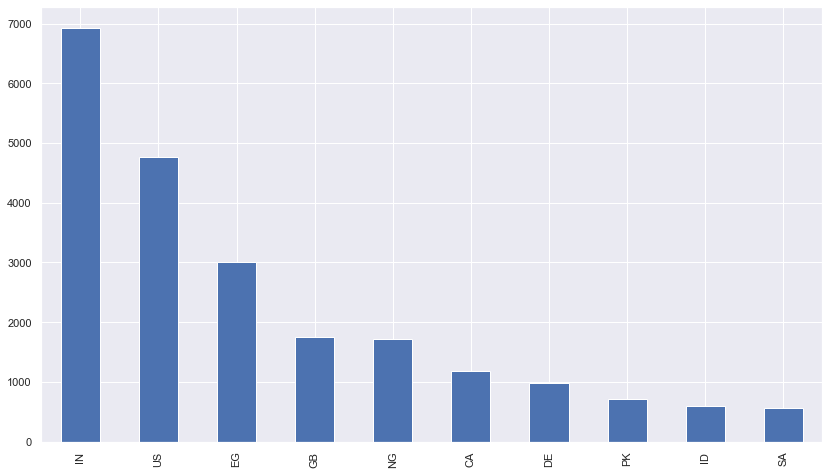

In [8]:
# Display top student countries
std_info.student_country.value_counts().nlargest(10).plot(kind='bar', figsize=(14,8))

<AxesSubplot:>

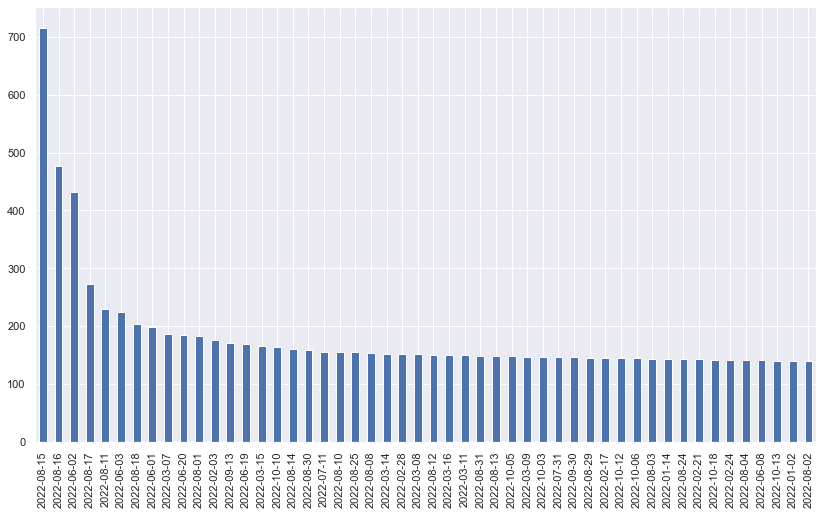

In [9]:
# Display top date registered
std_info.date_registered.value_counts().nlargest(50).plot(kind='bar', figsize=(14,8))

In [10]:
ts_std_info = std_info
ts_std_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35230 entries, 0 to 35229
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       35230 non-null  int64 
 1   student_country  35217 non-null  object
 2   date_registered  35230 non-null  object
dtypes: int64(1), object(2)
memory usage: 825.8+ KB


In [11]:
ts_std_info['count'] = 1
ts_std_info

,student_id,student_country,date_registered,count
0,258798,IN,2022-01-01,1
1,258799,CO,2022-01-01,1
2,258800,CA,2022-01-01,1
3,258801,IN,2022-01-01,1
4,258802,US,2022-01-01,1
...,...,...,...,...
35225,295511,CM,2022-10-20,1
35226,295512,CA,2022-10-20,1
35227,295513,SA,2022-10-20,1
35228,295514,NL,2022-10-20,1


In [12]:
#Convert to date format
ts_std_info['date_registered'] =  pd.to_datetime(ts_std_info['date_registered'], infer_datetime_format=True)

In [13]:
# Set date as index
ts_std_info.set_index('date_registered', inplace=True)

In [14]:
# Drop columns
ts_std_info.drop(['student_id', 'student_country'], axis=1, inplace=True)

In [15]:
ts_std_info = pd.DataFrame(ts_std_info.groupby(['date_registered']).sum().astype('int')) 
ts_std_info.head()

,count
date_registered,
2022-01-01,109
2022-01-02,140
2022-01-03,112
2022-01-04,125
2022-01-05,122


<AxesSubplot:title={'center':'Registrations over time'}, xlabel='date_registered'>

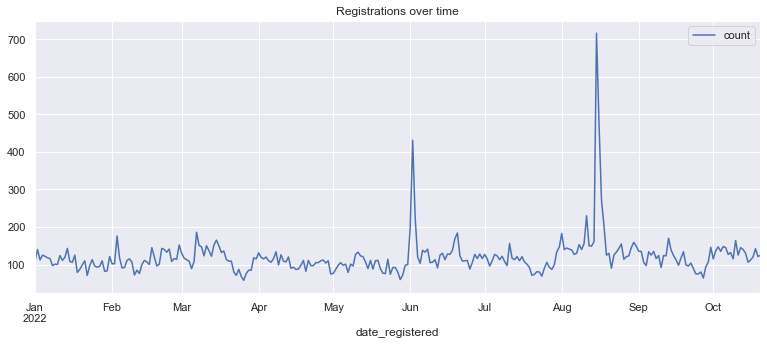

In [16]:
ts_std_info.plot(figsize=plotsize, title='Registrations over time')

Do we have a relationship between student country and date registered?

#### STUDENT purchases

In [17]:
std_purc.head()

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


In [18]:
std_purc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   purchase_id     3041 non-null   int64 
 1   student_id      3041 non-null   int64 
 2   purchase_type   3041 non-null   object
 3   date_purchased  3041 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.2+ KB


In [19]:
# Display sum of null value per column, sorted 
std_purc.isna().sum().sort_values(ascending = False)

purchase_id       0
student_id        0
purchase_type     0
date_purchased    0
dtype: int64

In [20]:
# Check unique values
for i in std_purc: print("No of Values for {} is {}".format(i,str(std_purc[i].nunique())))

No of Values for purchase_id is 3041
No of Values for student_id is 2135
No of Values for purchase_type is 3
No of Values for date_purchased is 293


In [21]:
# Information on categorical features
std_purc.describe(include='object').T.head(2)

,count,unique,top,freq
purchase_type,3041,3,Annual,1547
date_purchased,3041,293,2022-05-31,45


<AxesSubplot:ylabel='purchase_type'>

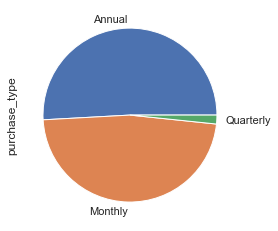

In [22]:
plt.figure()
std_purc["purchase_type"].value_counts().plot.pie()

The quaterly subscription is not often used.

<AxesSubplot:>

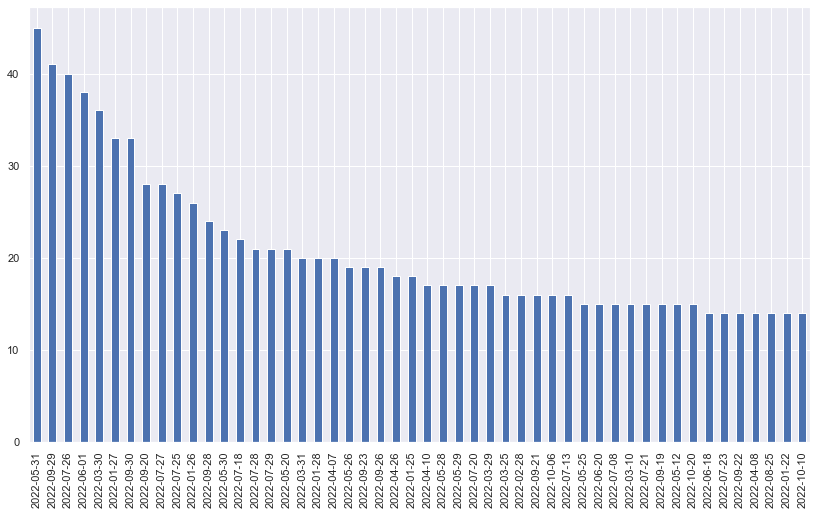

In [23]:
# Display top date purchased
std_purc.date_purchased.value_counts().nlargest(50).plot(kind='bar', figsize=(14,8))

We do have users who purchase more than 1 time.

I think we should keep only the lines with the 1st purchase date.

It could be interesting to measure the time during the registration and the purchase date.

In [24]:
ts_std_purc = std_purc

In [25]:
ts_std_purc['count'] = 1
ts_std_purc.head()

,purchase_id,student_id,purchase_type,date_purchased,count
0,15781,258800,Annual,2022-01-01,1
1,15786,258803,Annual,2022-01-01,1
2,15808,258862,Annual,2022-01-01,1
3,15809,258865,Annual,2022-01-01,1
4,15811,258878,Annual,2022-01-01,1


In [26]:
#Convert to date format
ts_std_purc['date_purchased'] =  pd.to_datetime(ts_std_purc['date_purchased'], infer_datetime_format=True)
ts_std_purc.head()

,purchase_id,student_id,purchase_type,date_purchased,count
0,15781,258800,Annual,2022-01-01,1
1,15786,258803,Annual,2022-01-01,1
2,15808,258862,Annual,2022-01-01,1
3,15809,258865,Annual,2022-01-01,1
4,15811,258878,Annual,2022-01-01,1


In [27]:
# Set date as index
ts_std_purc.set_index('date_purchased', inplace=True)

In [28]:
# Drop columns
ts_std_purc.drop(['purchase_id','student_id', 'purchase_type'], axis=1, inplace=True)

In [29]:
ts_std_purc = pd.DataFrame(ts_std_purc.groupby(['date_purchased']).sum().astype('int')) 
ts_std_purc.head()

,count
date_purchased,
2022-01-01,7
2022-01-02,3
2022-01-03,4
2022-01-04,6
2022-01-05,3


<AxesSubplot:title={'center':'Purchases over time'}, xlabel='date_purchased'>

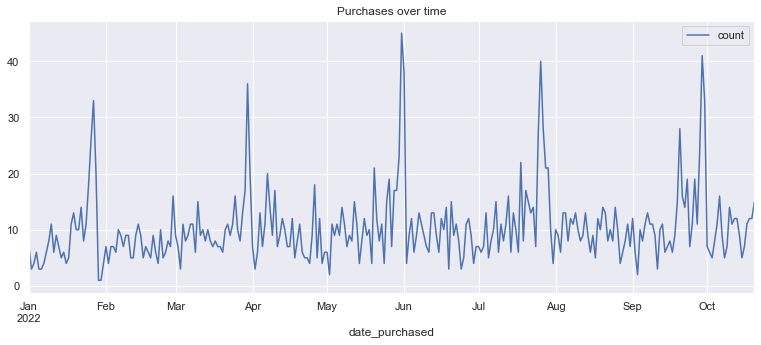

In [30]:
ts_std_purc.plot(figsize=plotsize, title='Purchases over time')

We can see the peaks related to the following events:

        
    Winter Sale 2022	                 Janurary 17th – January 28th
    Spring Special Offer 2022	        March 21st – March 31st
    Data Science Summer Campaign 2022	May 20th – June 1st
    Most Wanted Campaign	             July 18th – July 29th
    Platform gamification	            September 16th
    Data Science Hero Campaign	       September 19th – September 30th


#### STUDENT learnings

In [31]:
std_lear.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [32]:
std_lear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64535 entries, 0 to 64534
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       64535 non-null  int64  
 1   course_id        64535 non-null  int64  
 2   minutes_watched  64535 non-null  float64
 3   date_watched     64535 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ MB


In [33]:
# Display sum of null value per column, sorted 
std_lear.isna().sum().sort_values(ascending = False)

student_id         0
course_id          0
minutes_watched    0
date_watched       0
dtype: int64

In [34]:
# Descriptive statistics on numerical features
std_lear.describe().T.head(3)

,count,mean,std,min,25%,50%,75%,max
student_id,64535.0,273911.685148,10282.729746,258798.0,264688.5,272570.0,282305.5,295513.0
course_id,64535.0,19.297281,12.464339,2.0,7.0,16.0,24.0,67.0
minutes_watched,64535.0,28.545392,40.580553,0.0,3.8,15.9,38.1,1710.6


In [35]:
# Group analysis
std_lear.groupby(['student_id', 'course_id','date_watched','minutes_watched']).mean()

Empty DataFrame
Columns: []
Index: [(258798, 23, 2022-01-01, 0.3), (258800, 2, 2022-04-01, 12.9), (258800, 7, 2022-01-02, 2.7), (258800, 7, 2022-01-03, 46.8), (258800, 7, 2022-01-04, 4.3), (258800, 7, 2022-01-05, 61.6), (258800, 7, 2022-01-06, 45.1), (258800, 7, 2022-01-07, 31.7), (258800, 11, 2022-02-21, 0.5), (258800, 11, 2022-02-22, 1.1), (258800, 14, 2022-01-28, 4.0), (258800, 14, 2022-03-14, 2.1), (258800, 21, 2022-01-10, 34.7), (258800, 21, 2022-01-11, 7.1), (258800, 21, 2022-01-13, 13.1), (258800, 21, 2022-01-15, 21.3), (258800, 21, 2022-01-16, 9.4), (258800, 21, 2022-01-22, 5.2), (258800, 21, 2022-01-23, 30.6), (258800, 21, 2022-02-23, 6.9), (258800, 21, 2022-05-12, 7.6), (258800, 25, 2022-05-26, 0.7), (258800, 25, 2022-05-27, 44.0), (258800, 25, 2022-05-30, 1.5), (258800, 28, 2022-03-28, 46.1), (258800, 28, 2022-06-28, 0.3), (258800, 30, 2022-03-25, 0.1), (258800, 37, 2022-02-25, 34.2), (258800, 37, 2022-02-26, 32.6), (258800, 37, 2022-02-27, 23.0), (258803, 14, 2022-01-01, 62.6), (258803, 14, 2022-01-02, 86.8), (258803, 14, 2022-01-03, 43.6), (258803, 14, 2022-01-04, 42.9), (258803, 14, 2022-01-05, 21.4), (258803, 14, 2022-01-08, 52.8), (258803, 14, 2022-01-09, 28.3), (258803, 14, 2022-01-10, 19.3), (258803, 14, 2022-01-11, 37.9), (258803, 14, 2022-01-16, 0.7), (258803, 14, 2022-02-01, 67.1), (258803, 14, 2022-02-21, 6.8), (258803, 14, 2022-04-17, 1.6), (258803, 16, 2022-06-27, 6.9), (258803, 19, 2022-07-26, 52.0), (258803, 19, 2022-07-28, 3.5), (258803, 19, 2022-07-29, 0.1), (258803, 19, 2022-07-30, 44.7), (258803, 19, 2022-07-31, 41.0), (258804, 14, 2022-01-01, 14.2), (258807, 7, 2022-01-01, 1.8), (258809, 14, 2022-01-01, 4.1), (258809, 14, 2022-01-02, 9.2), (258809, 14, 2022-01-04, 40.0), (258810, 14, 2022-01-01, 3.2), (258811, 20, 2022-01-04, 16.8), (258811, 37, 2022-01-01, 1.7), (258811, 37, 2022-01-08, 19.9), (258811, 37, 2022-01-13, 3.5), (258812, 42, 2022-01-01, 2.2), (258813, 7, 2022-01-01, 2.1), (258814, 25, 2022-01-01, 4.9), (258814, 45, 2022-01-26, 3.9), (258815, 23, 2022-01-01, 29.0), (258816, 23, 2022-01-01, 0.8), (258817, 39, 2022-01-01, 0.4), (258818, 2, 2022-02-18, 6.7), (258818, 2, 2022-02-23, 18.0), (258818, 2, 2022-03-03, 7.1), (258818, 2, 2022-03-04, 12.3), (258818, 2, 2022-03-07, 5.8), (258818, 2, 2022-03-08, 24.0), (258818, 2, 2022-03-09, 30.5), (258818, 2, 2022-03-11, 18.5), (258818, 2, 2022-03-12, 19.4), (258818, 2, 2022-06-01, 0.2), (258818, 2, 2022-06-03, 51.9), (258818, 2, 2022-06-04, 0.4), (258818, 3, 2022-05-10, 27.6), (258818, 3, 2022-05-11, 69.1), (258818, 3, 2022-05-12, 8.7), (258818, 4, 2022-03-13, 34.7), (258818, 4, 2022-03-15, 18.6), (258818, 4, 2022-03-16, 27.2), (258818, 4, 2022-03-17, 10.2), (258818, 4, 2022-03-18, 27.3), (258818, 4, 2022-03-20, 15.8), (258818, 4, 2022-03-21, 18.1), (258818, 4, 2022-03-22, 17.0), (258818, 4, 2022-03-24, 13.4), (258818, 4, 2022-03-29, 32.9), (258818, 4, 2022-03-30, 29.4), (258818, 13, 2022-07-26, 13.9), (258818, 13, 2022-07-27, 3.0), (258818, 14, 2022-01-04, 43.6), (258818, 14, 2022-01-05, 34.6), (258818, 14, 2022-01-10, 27.1), (258818, 14, 2022-01-11, 45.0), (258818, 14, 2022-01-12, 14.4), (258818, 14, 2022-01-13, 19.0), ...]

[64535 rows x 0 columns]

In [36]:
ts_std_lear = std_lear

In [37]:
#Convert to date format
ts_std_lear['date_watched'] =  pd.to_datetime(ts_std_lear['date_watched'], infer_datetime_format=True)
ts_std_lear.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [38]:
# Set date as index
ts_std_lear.set_index('date_watched', inplace=True)

In [39]:
# Drop columns
ts_std_lear.drop(['course_id','student_id'], axis=1, inplace=True)

In [40]:
ts_std_lear['hours_watched'] = ts_std_lear['minutes_watched'] / 60
ts_std_lear.head()

,minutes_watched,hours_watched
date_watched,,
2022-01-01,0.3,0.005000
2022-04-01,12.9,0.215000
2022-01-03,46.8,0.780000
2022-01-04,4.3,0.071667
2022-01-07,31.7,0.528333


In [41]:
# Drop columns
ts_std_lear.drop(['minutes_watched'], axis=1, inplace=True)

In [42]:
ts_std_lear = pd.DataFrame(ts_std_lear.groupby(['date_watched']).sum().astype('int')) 
ts_std_lear.head()

,hours_watched
date_watched,
2022-01-01,8
2022-01-02,23
2022-01-03,23
2022-01-04,29
2022-01-05,35


<AxesSubplot:title={'center':'Hours watched over time'}, xlabel='date_watched'>

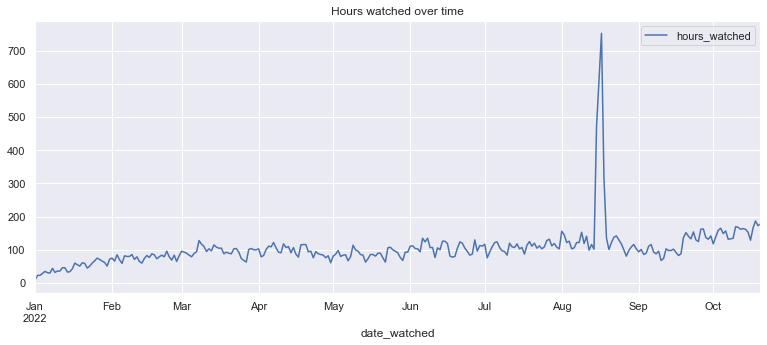

In [43]:
ts_std_lear.plot(figsize=plotsize, title='Hours watched over time')

We can see the weeks on the chart.
And also a peak mid august.

#### COURSE info

In [44]:
crs_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   course_id     46 non-null     int64 
 1   course_title  46 non-null     object
dtypes: int64(1), object(1)
memory usage: 864.0+ bytes


In [45]:
crs_info

,course_id,course_title
0,2,Introduction to Tableau
1,3,The Complete Data Visualization Course with Py...
2,4,Introduction to R Programming
3,5,Data Preprocessing with NumPy
4,7,Introduction to Data and Data Science
5,11,Data Cleaning and Preprocessing with pandas
6,12,Introduction to Business Analytics
7,13,Data Analysis with Excel Pivot Tables
8,14,SQL
9,15,Credit Risk Modeling in Python


In [46]:
# Check duplicates
check_dupl = crs_info.sort_values(by=['course_title'], ascending=True)
check_dupl

,course_id,course_title
41,53,A/B Testing in Python
36,48,AI Applications for Business Success
29,39,Advanced Microsoft Excel
30,41,Convolutional Neural Networks with TensorFlow ...
9,15,Credit Risk Modeling in Python
24,33,Customer Analytics in Python
7,13,Data Analysis with Excel Pivot Tables
5,11,Data Cleaning and Preprocessing with pandas
35,46,Data Literacy
3,5,Data Preprocessing with NumPy


#### COURSE ratings

In [47]:
crs_rate.head()

,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


In [48]:
crs_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_id      2500 non-null   int64 
 1   student_id     2500 non-null   int64 
 2   course_rating  2500 non-null   int64 
 3   date_rated     2500 non-null   object
dtypes: int64(3), object(1)
memory usage: 78.2+ KB


In [49]:
# Display sum of null value per column, sorted 
crs_rate.isna().sum().sort_values(ascending = False)

course_id        0
student_id       0
course_rating    0
date_rated       0
dtype: int64

In [50]:
# Check unique values
for i in crs_rate: print("No of Values for {} is {}".format(i,str(crs_rate[i].nunique())))

No of Values for course_id is 45
No of Values for student_id is 1287
No of Values for course_rating is 5
No of Values for date_rated is 127


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='course_rating', ylabel='Density'>

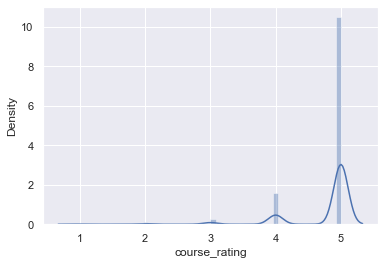

In [51]:
plt.figure()
sns.distplot(crs_rate["course_rating"])

Almost all courses are well noted. 
We should not get any information from those ratings.

#### STUDENT quizzs

In [52]:
std_quiz.head()

,student_id,quiz_id,question_id,answer_id
0,258803,537,796,3139.0
1,258803,159,793,3127.0
2,258803,159,794,3132.0
3,258803,160,181,710.0
4,258803,161,184,723.0


In [53]:
std_quiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147029 entries, 0 to 147028
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   student_id   147029 non-null  int64  
 1   quiz_id      147029 non-null  int64  
 2   question_id  147029 non-null  int64  
 3   answer_id    146800 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 4.5 MB


In [54]:
# Display sum of null value per column, sorted 
std_quiz.isna().sum().sort_values(ascending = False)

answer_id      229
student_id       0
quiz_id          0
question_id      0
dtype: int64

In [55]:
# Check unique values
for i in std_quiz: print("No of Values for {} is {}".format(i,str(std_quiz[i].nunique())))

No of Values for student_id is 7502
No of Values for quiz_id is 390
No of Values for question_id is 641
No of Values for answer_id is 1882


#### QUIZZ info

In [56]:
qui_info.head()

,quiz_id,question_id,answer_id,answer_correct
0,1,1,1,n
1,1,1,2,y
2,1,1,3,n
3,1,1,4,n
4,2,2,5,n


In [57]:
qui_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   quiz_id         4741 non-null   int64 
 1   question_id     4741 non-null   int64 
 2   answer_id       4741 non-null   int64 
 3   answer_correct  4741 non-null   object
dtypes: int64(3), object(1)
memory usage: 148.3+ KB


In [58]:
# Display sum of null value per column, sorted 
qui_info.isna().sum().sort_values(ascending = False)

quiz_id           0
question_id       0
answer_id         0
answer_correct    0
dtype: int64

In [59]:
# Create a merge dataframe student answers to quizz 
std_quiz_info = pd.merge(
                left=std_quiz,
                right=qui_info,
                on=['quiz_id','question_id','answer_id'],
#                left_on='course_title',
#                right_on='course_id',
                how='left'
)
std_quiz_info.head()

,student_id,quiz_id,question_id,answer_id,answer_correct
0,258803,537,796,3139.0,y
1,258803,159,793,3127.0,y
2,258803,159,794,3132.0,y
3,258803,160,181,710.0,y
4,258803,161,184,723.0,y


In [60]:
#Check the merge keep the same number of rows
len(std_quiz_info)

147029

In [61]:
#Check positive answer 
len(std_quiz_info[std_quiz_info['answer_correct'] == 'y'])

136341

In [62]:
std_quiz_info['answer_correct'].value_counts(normalize=True)

y    0.928772
n    0.071228
Name: answer_correct, dtype: float64

<AxesSubplot:ylabel='answer_correct'>

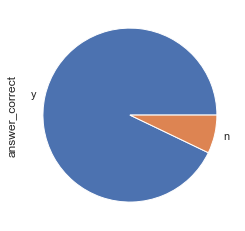

In [63]:
# Distribution of right and wrong answers to quizz
plt.figure()
std_quiz_info['answer_correct'].value_counts().plot.pie()

Almost 93% of right answers and around 7% of wrong answers

#### STUDENT exam

In [64]:
std_exam.head() 

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
0,173311,258803,475,83,5.17,2022-01-01
1,173332,258815,380,0,10.02,2022-01-01
2,173333,258815,380,67,7.93,2022-01-01
3,173335,258815,380,100,0.60,2022-01-01
4,173336,258815,380,0,10.02,2022-01-01


In [65]:
std_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34030 entries, 0 to 34029
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exam_attempt_id       34030 non-null  int64  
 1   student_id            34030 non-null  int64  
 2   exam_id               34030 non-null  int64  
 3   exam_result           34030 non-null  int64  
 4   exam_completion_time  34030 non-null  float64
 5   date_exam_completed   34030 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 1.6+ MB


In [66]:
# Display sum of null value per column, sorted 
std_exam.isna().sum().sort_values(ascending = False)

exam_attempt_id         0
student_id              0
exam_id                 0
exam_result             0
exam_completion_time    0
date_exam_completed     0
dtype: int64

#### EXAM info

In [67]:
exa_info.head() 

,exam_id,exam_category,exam_duration
0,118,2,14
1,119,2,14
2,120,1,26
3,276,2,15
4,277,2,15


In [68]:
exa_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   exam_id        156 non-null    int64
 1   exam_category  156 non-null    int64
 2   exam_duration  156 non-null    int64
dtypes: int64(3)
memory usage: 3.8 KB


In [69]:
# Display sum of null value per column, sorted 
exa_info.isna().sum().sort_values(ascending = False)

exam_id          0
exam_category    0
exam_duration    0
dtype: int64

In [70]:
# Create a merge dataframe student answers to exam 
std_exam_info = pd.merge(
                left=std_exam,
                right=exa_info,
                on='exam_id',
#                left_on='course_title',
#                right_on='course_id',
                how='left'
)
std_exam_info

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed,exam_category,exam_duration
0,173311,258803,475,83,5.17,2022-01-01,NaN,NaN
1,173332,258815,380,0,10.02,2022-01-01,NaN,NaN
2,173333,258815,380,67,7.93,2022-01-01,NaN,NaN
3,173335,258815,380,100,0.60,2022-01-01,NaN,NaN
4,173336,258815,380,0,10.02,2022-01-01,NaN,NaN
...,...,...,...,...,...,...,...,...
34025,240399,266321,654,83,2.02,2022-10-20,2.0,12.0
34026,240401,269110,685,67,2.63,2022-10-20,2.0,12.0
34027,240405,295234,530,0,16.00,2022-10-20,2.0,16.0
34028,240406,282935,714,67,4.55,2022-10-20,2.0,20.0


In [71]:
#Check the merge keep the same number of rows
len(std_exam_info)

34030

In [72]:
std_exam_info['exam_category'].value_counts(normalize=True)

2.0    0.814276
1.0    0.180501
4.0    0.005223
Name: exam_category, dtype: float64

In [73]:
std_exam_info['exam_category'].value_counts()

2.0    14499
1.0     3214
4.0       93
Name: exam_category, dtype: int64

<AxesSubplot:ylabel='exam_category'>

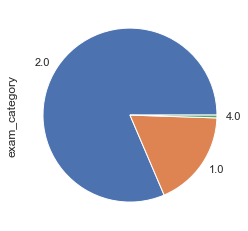

In [74]:
# Distribution of type of exams
plt.figure()
std_exam_info['exam_category'].value_counts().plot.pie()

In [75]:
std_exam_info.nunique()

exam_attempt_id         34030
student_id               3909
exam_id                   384
exam_result                76
exam_completion_time     2571
date_exam_completed       293
exam_category               3
exam_duration              29
dtype: int64

In [76]:
#exam_taken_by_id = std_exam_info[['student_id']].copy()
exam_taken_by_id = std_exam_info[std_exam_info['exam_result'] > 0.0].groupby('student_id')['exam_result'].count()
exam_taken_by_id

student_id
258800     7
258803     7
258815     2
258818    10
258822    11
          ..
295464     1
295466     3
295472     1
295473     1
295497     2
Name: exam_result, Length: 3766, dtype: int64

In [77]:
std_exam_info[std_exam_info['student_id'] == 258818]

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed,exam_category,exam_duration
60,174056,258818,380,0,10.00,2022-01-04,NaN,NaN
62,174060,258818,380,17,10.00,2022-01-04,NaN,NaN
71,174098,258818,380,100,4.77,2022-01-04,NaN,NaN
715,177442,258818,510,33,3.95,2022-01-18,NaN,NaN
716,177443,258818,510,67,2.88,2022-01-18,NaN,NaN
4846,188668,258818,401,67,9.00,2022-03-08,2.0,15.0
5300,189668,258818,402,100,4.23,2022-03-12,2.0,16.0
9984,199104,258818,408,50,2.35,2022-04-30,2.0,10.0
9985,199105,258818,408,100,0.65,2022-04-30,2.0,10.0
12817,204511,258818,500,33,5.08,2022-06-03,NaN,NaN


In [78]:
# Average exam results
avg_exam_res = pd.DataFrame(std_exam_info.groupby(['student_id'])['exam_result'].mean())

<AxesSubplot:ylabel='Count'>

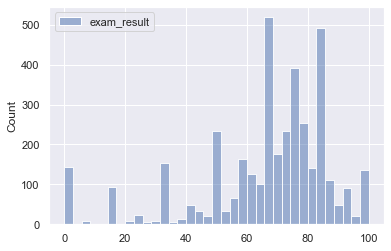

In [79]:
# Display histograms of average exam results
sns.histplot(avg_exam_res)

#### STUDENT engagement

In [80]:
std_enga.head()

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27


In [81]:
std_enga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65371 entries, 0 to 65370
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   engagement_id       65371 non-null  int64 
 1   student_id          65371 non-null  int64 
 2   engagement_quizzes  65371 non-null  int64 
 3   engagement_exams    65371 non-null  int64 
 4   engagement_lessons  65371 non-null  int64 
 5   date_engaged        65371 non-null  object
dtypes: int64(5), object(1)
memory usage: 3.0+ MB


In [82]:
# Display sum of null value per column, sorted 
std_enga.isna().sum().sort_values(ascending = False)

engagement_id         0
student_id            0
engagement_quizzes    0
engagement_exams      0
engagement_lessons    0
date_engaged          0
dtype: int64

In [83]:
# Check unique values
for i in std_enga: print("No of Values for {} is {}".format(i,str(std_enga[i].nunique())))

No of Values for engagement_id is 65371
No of Values for student_id is 18344
No of Values for engagement_quizzes is 2
No of Values for engagement_exams is 2
No of Values for engagement_lessons is 2
No of Values for date_engaged is 293


In [84]:
pd.crosstab(std_enga['engagement_quizzes'], std_enga['engagement_exams'])

engagement_exams,0,1
engagement_quizzes,,
0,34639,7507
1,16434,6791


In [85]:
chk_enga = (std_enga.groupby(['engagement_exams', 'engagement_quizzes']).engagement_lessons.value_counts()
          .rename('number').reset_index(2))
chk_enga

engagement_lessons  number
engagement_exams engagement_quizzes                            
0                0                                    1   34639
                 1                                    1   16278
                 1                                    0     156
1                0                                    1    6821
                 0                                    0     686
                 1                                    1    6763
                 1                                    0      28

In [86]:
std_exam_info[std_exam_info['student_id'] == 258818]

,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed,exam_category,exam_duration
60,174056,258818,380,0,10.00,2022-01-04,NaN,NaN
62,174060,258818,380,17,10.00,2022-01-04,NaN,NaN
71,174098,258818,380,100,4.77,2022-01-04,NaN,NaN
715,177442,258818,510,33,3.95,2022-01-18,NaN,NaN
716,177443,258818,510,67,2.88,2022-01-18,NaN,NaN
4846,188668,258818,401,67,9.00,2022-03-08,2.0,15.0
5300,189668,258818,402,100,4.23,2022-03-12,2.0,16.0
9984,199104,258818,408,50,2.35,2022-04-30,2.0,10.0
9985,199105,258818,408,100,0.65,2022-04-30,2.0,10.0
12817,204511,258818,500,33,5.08,2022-06-03,NaN,NaN


In [87]:
std_enga[(std_enga['student_id'] == 258818) & (std_enga['engagement_exams'] == 1)]

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
75,110945,258818,1,1,1,2022-04-30
76,110946,258818,1,1,1,2022-01-04
9524,166971,258818,0,1,1,2022-03-08
9525,166972,258818,0,1,1,2022-03-12
9526,166973,258818,0,1,1,2022-01-18
26655,479986,258818,0,1,1,2022-06-03


In [88]:
std_enga[(std_enga['student_id'] == 258818)]

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
58,110928,258818,1,0,1,2022-05-10
59,110929,258818,1,0,1,2022-03-13
60,110930,258818,1,0,1,2022-03-16
61,110931,258818,1,0,1,2022-03-17
62,110932,258818,1,0,1,2022-03-18
...,...,...,...,...,...,...
46972,1740191,258818,0,0,1,2022-08-19
53542,2080955,258818,0,0,1,2022-09-14
53779,2092928,258818,0,0,1,2022-09-15
54070,2105020,258818,0,0,1,2022-09-16


In [89]:
calc_enga_tot = std_enga
calc_enga_tot['enga_total'] = calc_enga_tot['engagement_quizzes'] + calc_enga_tot['engagement_exams'] + calc_enga_tot['engagement_lessons'] 
calc_enga_tot

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,enga_total
0,1,274999,1,1,1,2022-05-27,3
1,3,274501,0,0,1,2022-05-27,1
2,4,272842,1,1,1,2022-05-27,3
3,8,275173,0,0,1,2022-05-27,1
4,11,274876,0,1,0,2022-05-27,1
...,...,...,...,...,...,...,...
65366,2649439,295185,0,0,1,2022-10-20,1
65367,2649446,282935,0,1,1,2022-10-20,2
65368,2649658,292048,0,0,1,2022-10-20,1
65369,2649818,295443,0,0,1,2022-10-20,1


In [90]:
calc_enga = calc_enga_tot.groupby(['student_id']).sum()
calc_enga.reset_index(inplace=True)
calc_enga

,student_id,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,enga_total
0,258798,378673,0,0,1,1
1,258800,8387276,10,5,29,44
2,258803,10051170,7,4,19,30
3,258804,110921,1,0,1,2
4,258807,378694,0,0,1,1
...,...,...,...,...,...,...
18339,295509,2648750,0,0,1,1
18340,295510,2648820,0,0,1,1
18341,295511,2648943,1,0,1,2
18342,295512,2649150,1,0,1,2


In [91]:
calc_enga[calc_enga['student_id'] == 258800]

,student_id,engagement_id,engagement_quizzes,engagement_exams,engagement_lessons,enga_total
1,258800,8387276,10,5,29,44


#### STUDENT hub questions

In [92]:
std_hubq.head() 

,hub_question_id,student_id,date_question_asked
0,7619,258803,2022-01-03
1,7630,258803,2022-01-04
2,7662,259342,2022-01-05
3,7667,259391,2022-01-05
4,7668,259174,2022-01-05


In [93]:
std_hubq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   hub_question_id      827 non-null    int64 
 1   student_id           827 non-null    int64 
 2   date_question_asked  827 non-null    object
dtypes: int64(2), object(1)
memory usage: 19.5+ KB


In [94]:
# Display sum of null value per column, sorted 
std_hubq.isna().sum().sort_values(ascending = False)

hub_question_id        0
student_id             0
date_question_asked    0
dtype: int64

## Data modeling & ML-ready dataset building

In [95]:
df_info = pd.read_csv("365_learning_challenge/365_database/365_student_info.csv")
df_purc = pd.read_csv("365_learning_challenge/365_database/365_student_purchases.csv")
print("taille 1er dataset:", len(df_info))
print("taille 2ème dataset:", len(df_purc))

taille 1er dataset: 35230
taille 2ème dataset: 3041


In [96]:
#Convert to date format
df_purc["date_purchased"]  =  pd.to_datetime(df_purc["date_purchased"] , infer_datetime_format=True)
df_purc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   purchase_id     3041 non-null   int64         
 1   student_id      3041 non-null   int64         
 2   purchase_type   3041 non-null   object        
 3   date_purchased  3041 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 95.2+ KB


In [97]:
# Delete 13 entries with no country 
df_info=df_info.dropna(subset=['student_country'])

In [98]:
# Student with 10 purchases
df_purc[(df_purc['student_id'] == 259258)]

,purchase_id,student_id,purchase_type,date_purchased
15,15865,259258,Monthly,2022-01-04
287,16733,259258,Monthly,2022-02-04
507,17408,259258,Monthly,2022-03-04
837,18255,259258,Monthly,2022-04-04
1107,19061,259258,Monthly,2022-05-04
1509,19952,259258,Monthly,2022-06-04
1777,20569,259258,Monthly,2022-07-04
2186,21430,259258,Monthly,2022-08-04
2480,22053,259258,Monthly,2022-09-04
2838,22749,259258,Annual,2022-09-30


In [99]:
# Create a new dataframe with unique student id and the oldest purchase date.
# Indeed, we do have students with more than one purchase.
df_purc_uni = df_purc.groupby('student_id').agg(date_purchased = ('date_purchased', 'min')).reset_index() # min not max
df_purc_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   student_id      2135 non-null   int64         
 1   date_purchased  2135 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 33.5 KB


In [100]:
# Student is unique with oldest purchase date
df_purc_uni[(df_purc_uni['student_id'] == 259258)]

,student_id,date_purchased
29,259258,2022-01-04


In [101]:
# Create a merge dataframe 
df_info_purch = pd.merge(
                left=df_info,
                right=df_purc_uni,
                on='student_id',
                how='left'
)
df_info_purch

,student_id,student_country,date_registered,date_purchased
0,258798,IN,2022-01-01,NaT
1,258799,CO,2022-01-01,NaT
2,258800,CA,2022-01-01,2022-01-01
3,258801,IN,2022-01-01,NaT
4,258802,US,2022-01-01,NaT
...,...,...,...,...
35212,295511,CM,2022-10-20,NaT
35213,295512,CA,2022-10-20,NaT
35214,295513,SA,2022-10-20,NaT
35215,295514,NL,2022-10-20,NaT


In [102]:
df_info_purch['student_id'].nunique()

35217

#### Define 14 days period after registration

In [103]:
# Create a new column date diff between purchase and registration dates
df_info_purch['diff_regis_purch'] = (df_info_purch['date_purchased'].apply(pd.to_datetime) - df_info_purch['date_registered'].apply(pd.to_datetime)).dt.days

# Check positive difference
#df_info_purch[(df_info_purch['diff_regis_purch'] > 0)]

# Difference dataframe
diff = df_info_purch[pd.notnull(df_info_purch['diff_regis_purch'])]

<AxesSubplot:ylabel='Frequency'>

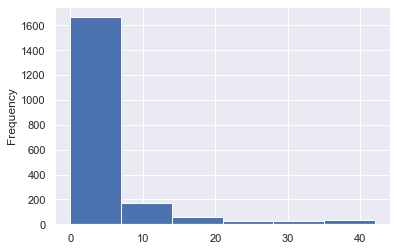

In [104]:
# Histogram of difference between purchase and registration dates per week (7 days)
diff['diff_regis_purch'].plot(kind='hist', bins = np.arange(0,49,7))

Most of the student who made a purchase did it in the first days after the registration.
This was also mentionned by 365 Data Science.
Thus, I will confine the features to the first 2 weeks after registration (14 days)

In [105]:
df_info_purch['date_registered'] = pd.to_datetime(df_info_purch['date_registered'],dayfirst=True)
df_info_purch['date_registered_+14'] = df_info_purch['date_registered'] + timedelta(days=14)
df_info_purch

,student_id,student_country,date_registered,date_purchased,diff_regis_purch,date_registered_+14
0,258798,IN,2022-01-01,NaT,NaN,2022-01-15
1,258799,CO,2022-01-01,NaT,NaN,2022-01-15
2,258800,CA,2022-01-01,2022-01-01,0.0,2022-01-15
3,258801,IN,2022-01-01,NaT,NaN,2022-01-15
4,258802,US,2022-01-01,NaT,NaN,2022-01-15
...,...,...,...,...,...,...
35212,295511,CM,2022-10-20,NaT,NaN,2022-11-03
35213,295512,CA,2022-10-20,NaT,NaN,2022-11-03
35214,295513,SA,2022-10-20,NaT,NaN,2022-11-03
35215,295514,NL,2022-10-20,NaT,NaN,2022-11-03


#### Learnings during the 14 days after registration

In [106]:
df_learn = pd.read_csv("365_learning_challenge/365_database/365_student_learning.csv")
df_learn

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07
...,...,...,...,...
64530,295509,23,0.8,2022-10-20
64531,295510,53,0.1,2022-10-20
64532,295511,7,7.8,2022-10-20
64533,295512,7,10.4,2022-10-20


In [107]:
# Select learnings during the 14 days after registration
df_learn_14 = df_learn.merge(df_info_purch,how='left',on='student_id')
df_learn_14 = df_learn_14[df_learn_14['date_watched'] <= df_learn_14['date_registered_+14']]

#Controls
#df_learn_14[(df_learn_14['student_id'] == 258800)]

# Calculation of the number of days with learning watch within the 14 days after registration
days_watched_14 = pd.DataFrame(df_learn_14.groupby(['student_id'])['course_id'].count())
days_watched_14

# Calculation of the number of minutes of learning watch within the 14 days after registration
minutes_watched_14 = pd.DataFrame(df_learn_14.groupby(['student_id'])['minutes_watched'].sum())
minutes_watched_14

df_learn_14 = days_watched_14.merge(minutes_watched_14,how='left',on='student_id')

df_learn_14.rename(columns={'course_id':'days_watched_14'}, inplace=True)
df_learn_14.rename(columns={'minutes_watched':'minutes_watched_14'}, inplace=True)

df_learn_14.head()

,days_watched_14,minutes_watched_14
student_id,,
258798,1,0.3
258800,10,268.4
258803,9,395.6
258804,1,14.2
258807,1,1.8


#### Exams during the 14 days after registration

In [108]:
df_exam = pd.read_csv("365_learning_challenge/365_database/365_student_exams.csv")

In [109]:
# Select exams during the 14 days after registration
df_exam_14 = df_exam.merge(df_info_purch,how='left',on='student_id')
df_exam_14 = df_exam_14[df_exam_14['date_exam_completed'] <= df_exam_14['date_registered_+14']]

# Controls
#df_exam_14.head(10)
#df_exam_14[(df_exam_14['student_id'] == 258803)]

# Average exam results during the 14 days after registration
avg_exam_result_14 = pd.DataFrame(df_exam_14.groupby(['student_id'])['exam_result'].mean())
avg_exam_result_14.rename(columns={'exam_result':'avg_exam_result'}, inplace=True)
avg_exam_result_14

,avg_exam_result
student_id,
258800,66.000000
258803,88.666667
258815,41.750000
258818,39.000000
258822,55.125000
...,...
295464,67.000000
295466,72.333333
295472,17.000000


Text(0.5, 0, 'Average exams results')

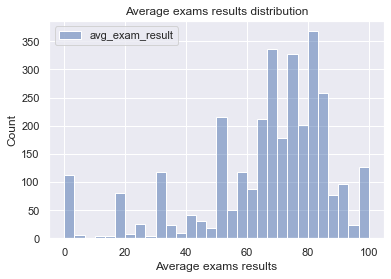

In [110]:
# Display average exam results
sns.histplot(avg_exam_result_14)
plt.title('Average exams results distribution')
plt.xlabel('Average exams results')

#### Engagements during the 14 days after registration

In [111]:
df_enga = pd.read_csv("365_learning_challenge/365_database/365_student_engagement.csv")

In [112]:
# Select engagements during the 14 days after registration
df_enga_14 = df_enga.merge(df_info_purch,how='left',on='student_id')
df_enga_14 = df_enga_14[df_enga_14['date_engaged'] <= df_enga_14['date_registered_+14']]

#df_enga_14.head(10)
#df_enga_14[(df_enga_14['student_id'] == 258803)]

df_enga_tot_14 = df_enga_14.groupby('student_id').agg(engagement_quizzes = ('engagement_quizzes', 'sum'),
                                                      engagement_exams   = ('engagement_exams',   'sum'),
                                                      engagement_lessons = ('engagement_lessons', 'sum'),).reset_index()


#total_engagement = pd.DataFrame(df_enga_14.groupby(['student_id'])['engagement_id'].count())
df_enga_tot_14['engagement_total']= df_enga_tot_14['engagement_quizzes'] + df_enga_tot_14['engagement_exams'] + df_enga_tot_14['engagement_lessons']
df_enga_tot_14

,student_id,engagement_quizzes,engagement_exams,engagement_lessons,engagement_total
0,258798,0,0,1,1
1,258800,6,3,10,19
2,258803,5,3,9,17
3,258804,1,0,1,2
4,258807,0,0,1,1
...,...,...,...,...,...
17460,295509,0,0,1,1
17461,295510,0,0,1,1
17462,295511,1,0,1,2
17463,295512,1,0,1,2


#### Hub questions during the 14 days after registration

In [113]:
df_enga_tot_14['student_id'].nunique()

17465

In [114]:
df_hubq = pd.read_csv("365_learning_challenge/365_database/365_student_hub_questions.csv")

In [115]:
# Select hub questions during the 14 days after registration
df_hubq_14 = df_hubq.merge(df_info_purch,how='left',on='student_id')
df_hubq_14 = df_hubq_14[df_hubq_14['date_question_asked'] <= df_hubq_14['date_registered_+14']]

df_hubq_14.head(10)
df_hubq_14[(df_hubq_14['student_id'] == 258803)]

total_hubq_14 = pd.DataFrame(df_hubq_14.groupby(['student_id'])['hub_question_id'].count())
total_hubq_14.rename(columns={'hub_question_id':'nb_hub_questions'}, inplace=True)
total_hubq_14


,nb_hub_questions
student_id,
258803,2
258818,1
259174,4
259342,1
259391,1
...,...
293109,1
293437,1
293541,1


#### Merge all data

In [116]:
print("Student info + purchase dataframe shape:", df_info_purch.shape),
print("Engagement dataframe shape:", df_enga_tot_14.shape),
print("Learning dataframe shape:", df_learn_14.shape),
print("Average exams results dataframe shape:", avg_exam_result_14.shape),
print("Total hub questions dataframe shape:", total_hubq_14.shape),

Student info + purchase dataframe shape: (35217, 6)
Engagement dataframe shape: (17465, 5)
Learning dataframe shape: (17296, 2)
Average exams results dataframe shape: (3161, 1)
Total hub questions dataframe shape: (115, 1)


(None,)

In [117]:
df_all = df_info_purch.merge(df_enga_tot_14,how='left',on='student_id').merge(df_learn_14,how='left',on='student_id').merge(avg_exam_result_14,how='left',on='student_id').merge(total_hubq_14,how='left',on='student_id')
df_all

,student_id,student_country,date_registered,date_purchased,diff_regis_purch,date_registered_+14,engagement_quizzes,engagement_exams,engagement_lessons,engagement_total,days_watched_14,minutes_watched_14,avg_exam_result,nb_hub_questions
0,258798,IN,2022-01-01,NaT,NaN,2022-01-15,0.0,0.0,1.0,1.0,1.0,0.3,NaN,NaN
1,258799,CO,2022-01-01,NaT,NaN,2022-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,258800,CA,2022-01-01,2022-01-01,0.0,2022-01-15,6.0,3.0,10.0,19.0,10.0,268.4,66.0,NaN
3,258801,IN,2022-01-01,NaT,NaN,2022-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,258802,US,2022-01-01,NaT,NaN,2022-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35212,295511,CM,2022-10-20,NaT,NaN,2022-11-03,1.0,0.0,1.0,2.0,1.0,7.8,NaN,NaN
35213,295512,CA,2022-10-20,NaT,NaN,2022-11-03,1.0,0.0,1.0,2.0,1.0,10.4,NaN,NaN
35214,295513,SA,2022-10-20,NaT,NaN,2022-11-03,0.0,0.0,1.0,1.0,1.0,0.1,NaN,NaN
35215,295514,NL,2022-10-20,NaT,NaN,2022-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Display sum of null value per column, sorted 
#df_all.isna().sum().sort_values(ascending = False)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35217 entries, 0 to 35216
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   student_id           35217 non-null  int64         
 1   student_country      35217 non-null  object        
 2   date_registered      35217 non-null  datetime64[ns]
 3   date_purchased       2134 non-null   datetime64[ns]
 4   diff_regis_purch     2134 non-null   float64       
 5   date_registered_+14  35217 non-null  datetime64[ns]
 6   engagement_quizzes   17465 non-null  float64       
 7   engagement_exams     17465 non-null  float64       
 8   engagement_lessons   17465 non-null  float64       
 9   engagement_total     17465 non-null  float64       
 10  days_watched_14      17296 non-null  float64       
 11  minutes_watched_14   17296 non-null  float64       
 12  avg_exam_result      3161 non-null   float64       
 13  nb_hub_questions     115 non-nu

In [119]:
#Check unique student id
df_all['student_id'].nunique()

35217

In [120]:
df_all.drop(['date_registered','diff_regis_purch', 'date_registered_+14'], axis=1, inplace=True)

In [121]:
df_all.rename(columns={'date_purchased':'subscribed'}, inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35217 entries, 0 to 35216
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   student_id          35217 non-null  int64         
 1   student_country     35217 non-null  object        
 2   subscribed          2134 non-null   datetime64[ns]
 3   engagement_quizzes  17465 non-null  float64       
 4   engagement_exams    17465 non-null  float64       
 5   engagement_lessons  17465 non-null  float64       
 6   engagement_total    17465 non-null  float64       
 7   days_watched_14     17296 non-null  float64       
 8   minutes_watched_14  17296 non-null  float64       
 9   avg_exam_result     3161 non-null   float64       
 10  nb_hub_questions    115 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 3.2+ MB


In [122]:
# Display sum of null value per column, sorted 
df_all.isna().sum().sort_values(ascending = False)

nb_hub_questions      35102
subscribed            33083
avg_exam_result       32056
days_watched_14       17921
minutes_watched_14    17921
engagement_quizzes    17752
engagement_exams      17752
engagement_lessons    17752
engagement_total      17752
student_id                0
student_country           0
dtype: int64

In [123]:
df_all

,student_id,student_country,subscribed,engagement_quizzes,engagement_exams,engagement_lessons,engagement_total,days_watched_14,minutes_watched_14,avg_exam_result,nb_hub_questions
0,258798,IN,NaT,0.0,0.0,1.0,1.0,1.0,0.3,NaN,NaN
1,258799,CO,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,258800,CA,2022-01-01,6.0,3.0,10.0,19.0,10.0,268.4,66.0,NaN
3,258801,IN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,258802,US,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35212,295511,CM,NaT,1.0,0.0,1.0,2.0,1.0,7.8,NaN,NaN
35213,295512,CA,NaT,1.0,0.0,1.0,2.0,1.0,10.4,NaN,NaN
35214,295513,SA,NaT,0.0,0.0,1.0,1.0,1.0,0.1,NaN,NaN
35215,295514,NL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
df_all["subscribed"] = np.where(df_all["subscribed"].isnull(), 0, 1)
df_all["subscribed"]  = df_all["subscribed"].astype('int')

In [125]:
df_all.rename(columns={'engagement_quizzes':'is_engaged_quizzes'}, inplace=True)
df_all['is_engaged_quizzes'] = np.where(df_all["is_engaged_quizzes"].isnull(), 0, df_all['is_engaged_quizzes'])
df_all['is_engaged_quizzes'] = np.where(df_all["is_engaged_quizzes"] > 0, 1, 0)
df_all['is_engaged_quizzes']  = df_all['is_engaged_quizzes'].astype('int')

In [126]:
df_all.rename(columns={'engagement_exams':'is_engaged_exams'}, inplace=True)
df_all['is_engaged_exams'] = np.where(df_all["is_engaged_exams"].isnull(), 0, df_all['is_engaged_exams'])
df_all['is_engaged_exams'] = np.where(df_all["is_engaged_exams"] > 0, 1, 0)
df_all['is_engaged_exams']  = df_all['is_engaged_exams'].astype('int')

In [127]:
df_all.rename(columns={'engagement_lessons':'is_engaged_lessons'}, inplace=True)
df_all['is_engaged_lessons'] = np.where(df_all["is_engaged_lessons"].isnull(), 0, df_all['is_engaged_lessons'])
df_all['is_engaged_lessons'] = np.where(df_all["is_engaged_lessons"] > 0, 1, 0)
df_all['is_engaged_lessons']  = df_all['is_engaged_lessons'].astype('int')

In [128]:
df_all.rename(columns={'engagement_total':'engagement_days'}, inplace=True)
df_all['engagement_days'] = np.where(df_all["engagement_days"].isnull(), 0, df_all['engagement_days'])
df_all['engagement_days'] = df_all['engagement_days'].astype('int')

In [129]:
df_all.rename(columns={'days_watched_14':'watched_days'}, inplace=True)
df_all['watched_days'] = np.where(df_all["watched_days"].isnull(), 0, df_all['watched_days'])
df_all['watched_days'] = df_all['watched_days'].astype('int')

In [130]:
df_all.rename(columns={'minutes_watched_14':'watched_minutes'}, inplace=True)
df_all['watched_minutes'] = np.where(df_all["watched_minutes"].isnull(), 0, df_all['watched_minutes'])
df_all['watched_minutes'] = df_all['watched_minutes'].astype('float')

In [131]:
df_all['avg_exam_result'] = np.where(df_all["avg_exam_result"].isnull(), 0, df_all['avg_exam_result'])
df_all['avg_exam_result'] = df_all['avg_exam_result'].astype('float')

In [132]:
df_all.rename(columns={'nb_hub_questions':'is_engaged_hub'}, inplace=True)
df_all['is_engaged_hub'] = np.where(df_all["is_engaged_hub"].isnull(), 0, df_all['is_engaged_hub'])
df_all['is_engaged_hub'] = np.where(df_all["is_engaged_hub"] > 0, 1, 0)
df_all['is_engaged_hub']  = df_all['is_engaged_hub'].astype('int')

In [133]:
df_all

,student_id,student_country,subscribed,is_engaged_quizzes,is_engaged_exams,is_engaged_lessons,engagement_days,watched_days,watched_minutes,avg_exam_result,is_engaged_hub
0,258798,IN,0,0,0,1,1,1,0.3,0.0,0
1,258799,CO,0,0,0,0,0,0,0.0,0.0,0
2,258800,CA,1,1,1,1,19,10,268.4,66.0,0
3,258801,IN,0,0,0,0,0,0,0.0,0.0,0
4,258802,US,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
35212,295511,CM,0,1,0,1,2,1,7.8,0.0,0
35213,295512,CA,0,1,0,1,2,1,10.4,0.0,0
35214,295513,SA,0,0,0,1,1,1,0.1,0.0,0
35215,295514,NL,0,0,0,0,0,0,0.0,0.0,0


In [134]:
total_subscriber = df_all['subscribed'].sum()
print("Total subscribed:", total_subscriber)

Total subscribed: 2134


In [135]:
total_is_engaged_quizzes = df_all['is_engaged_quizzes'].sum()
print("Total is_engaged_quizzes:", total_is_engaged_quizzes)

Total is_engaged_quizzes: 6791


In [136]:
total_is_engaged_exams = df_all['is_engaged_exams'].sum()
print("Total is_engaged_exams:", total_is_engaged_exams)

Total is_engaged_exams: 3127


In [137]:
total_is_engaged_lessons = df_all['is_engaged_lessons'].sum()
print("Total is_engaged_lessons:", total_is_engaged_lessons)

Total is_engaged_lessons: 17293


In [138]:
total_is_engaged_hub = df_all['is_engaged_hub'].sum()
print("Total is_engaged_hub:", total_is_engaged_hub)

Total is_engaged_hub: 115


In [139]:
# Count duplicate on a column
df_all.student_id.duplicated().sum()

0

In [140]:
df_all.drop(['student_id'], axis=1, inplace=True)

## 2. EDA

In [141]:
eda = df_all

### 2.1 Discover data

In [142]:
eda.shape

(35217, 10)

In [143]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35217 entries, 0 to 35216
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_country     35217 non-null  object 
 1   subscribed          35217 non-null  int32  
 2   is_engaged_quizzes  35217 non-null  int32  
 3   is_engaged_exams    35217 non-null  int32  
 4   is_engaged_lessons  35217 non-null  int32  
 5   engagement_days     35217 non-null  int32  
 6   watched_days        35217 non-null  int32  
 7   watched_minutes     35217 non-null  float64
 8   avg_exam_result     35217 non-null  float64
 9   is_engaged_hub      35217 non-null  int32  
dtypes: float64(2), int32(7), object(1)
memory usage: 2.0+ MB


### Check missing values

In [144]:
# Display sum of null value per column
eda.isna().sum()

# Display sum of null value per column, sorted 
eda.isna().sum().sort_values(ascending = False)

student_country       0
subscribed            0
is_engaged_quizzes    0
is_engaged_exams      0
is_engaged_lessons    0
engagement_days       0
watched_days          0
watched_minutes       0
avg_exam_result       0
is_engaged_hub        0
dtype: int64

### Features overview

In [145]:
for i in eda: print("No of Values for {} is {}".format(i,str(eda[i].nunique())))

No of Values for student_country is 180
No of Values for subscribed is 2
No of Values for is_engaged_quizzes is 2
No of Values for is_engaged_exams is 2
No of Values for is_engaged_lessons is 2
No of Values for engagement_days is 37
No of Values for watched_days is 16
No of Values for watched_minutes is 2765
No of Values for avg_exam_result is 724
No of Values for is_engaged_hub is 2


### Distribution of target variable

Text(0.5, 1.0, 'subscribed distribution')

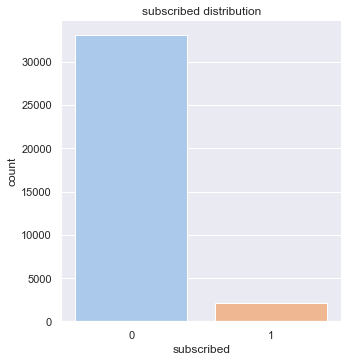

In [146]:
# Bar chart with Seaborn
sns.catplot(x="subscribed", data=eda, kind="count", palette="pastel")
plt.title('subscribed distribution')

In [147]:
# Percentage
eda['subscribed'].value_counts(normalize=True)

0    0.939404
1    0.060596
Name: subscribed, dtype: float64

The distibution is very imbalanced: only 6% of student subscribe during the 14 days after registration 

### Analysis of features

In [148]:
# Descriptive statistics on numerical features
eda.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
subscribed,35217.0,0.060596,0.238591,0.0,0.0,0.0,0.0,1.0
is_engaged_quizzes,35217.0,0.192833,0.394529,0.0,0.0,0.0,0.0,1.0
is_engaged_exams,35217.0,0.088792,0.284448,0.0,0.0,0.0,0.0,1.0
is_engaged_lessons,35217.0,0.491041,0.499927,0.0,0.0,0.0,1.0,1.0
engagement_days,35217.0,1.450777,3.167342,0.0,0.0,0.0,1.0,36.0
watched_days,35217.0,0.916234,1.678116,0.0,0.0,0.0,1.0,15.0
watched_minutes,35217.0,21.747412,89.681779,0.0,0.0,0.0,6.4,3567.7
avg_exam_result,35217.0,5.951735,20.098837,0.0,0.0,0.0,0.0,100.0
is_engaged_hub,35217.0,0.003265,0.057052,0.0,0.0,0.0,0.0,1.0


In [149]:
# Information on categorical features
eda.describe(include='object').T.head(9)

,count,unique,top,freq
student_country,35217,180,IN,6933


<AxesSubplot:>

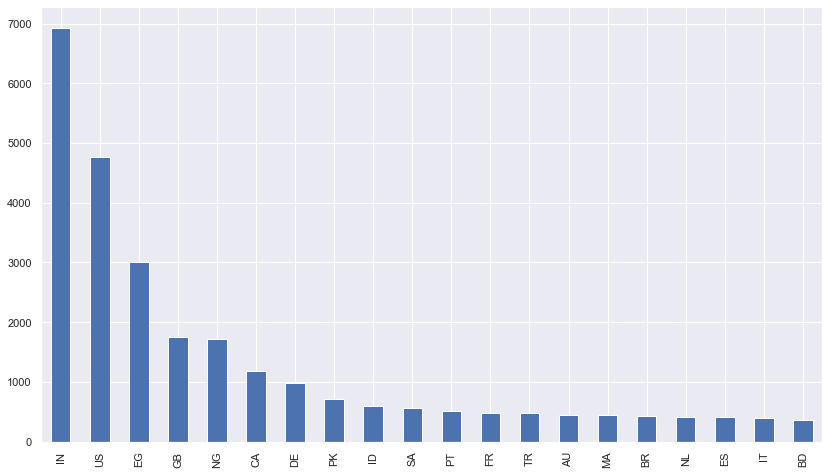

In [150]:
eda.student_country.value_counts().nlargest(20).plot(kind='bar', figsize=(14,8))

#### Relationship between features & target variable

<AxesSubplot:xlabel='student_country', ylabel='count'>

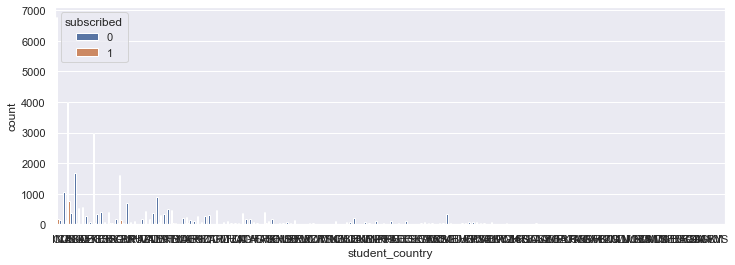

In [151]:
plt.figure(figsize=(12,4))
sns.countplot(x="student_country", hue='subscribed', data=eda)

In [152]:
# Group analysis
eda.groupby(['subscribed','student_country']).mean()

is_engaged_quizzes  is_engaged_exams  \
subscribed student_country                                         
0          AD                         0.000000          0.000000   
           AE                         0.184685          0.067568   
           AF                         0.000000          0.000000   
           AG                         1.000000          0.000000   
           AL                         0.238095          0.190476   
...                                        ...               ...   
1          VE                         1.000000          1.000000   
           VN                         0.615385          0.538462   
           ZA                         0.769231          0.615385   
           ZM                         1.000000          1.000000   
           ZW                         1.000000          1.000000   

                            is_engaged_lessons  engagement_days  watched_days  \
subscribed student_country                                                      
0          AD                         0.000000         0.000000      0.000000   
           AE                         0.522523         1.193694      0.824324   
           AF                         0.000000         0.000000      0.000000   
           AG                         1.000000         2.000000      1.000000   
           AL                         0.428571         1.523810      1.000000   
...                                        ...              ...           ...   
1          VE                         1.000000        17.000000      8.000000   
           VN                         0.846154         8.846154      4.923077   
           ZA                         0.923077         8.923077      4.615385   
           ZM                         1.000000        13.000000     10.000000   
           ZW                         1.000000        15.500000      8.000000   

                            watched_minutes  avg_exam_result  is_engaged_hub  
subscribed student_country                                                    
0          AD                      0.000000         0.000000             0.0  
           AE                     13.718919         3.446362             0.0  
           AF                      0.000000         0.000000             0.0  
           AG                      6.200000         0.000000             0.0  
           AL                     21.404762        15.161905             0.0  
...                                     ...              ...             ...  
1          VE                    168.300000        71.700000             0.0  
           VN                    197.546154        41.044872             0.0  
           ZA                    136.892308        47.452228             0.0  
           ZM                    269.200000        79.666667             0.0  
           ZW                    376.250000        83.821429             0.0  

[296 rows x 8 columns]

<Figure size 576x288 with 0 Axes>

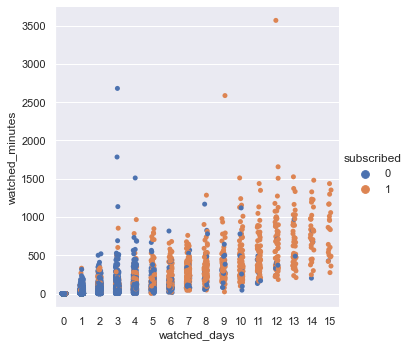

In [153]:
# Display correlation between numeric variables
plt.figure(figsize=(8, 4))
sns.catplot(x="watched_days", y="watched_minutes", data=eda, hue="subscribed")

<Figure size 576x288 with 0 Axes>

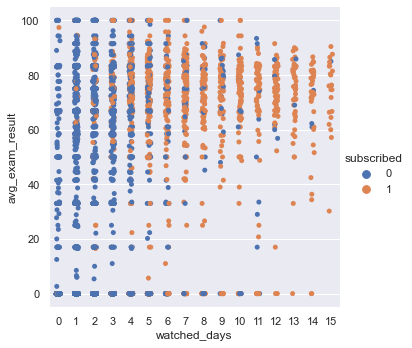

In [154]:
# Display correlation between numeric variables
plt.figure(figsize=(8, 4))
sns.catplot(x="watched_days", y="avg_exam_result", data=eda, hue="subscribed")

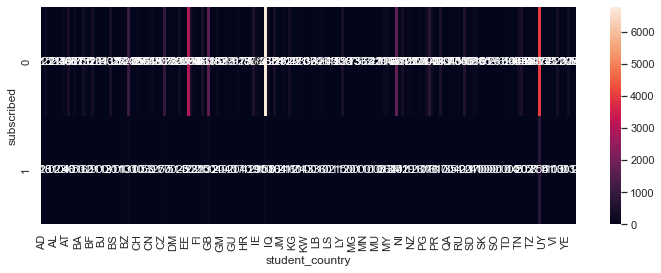

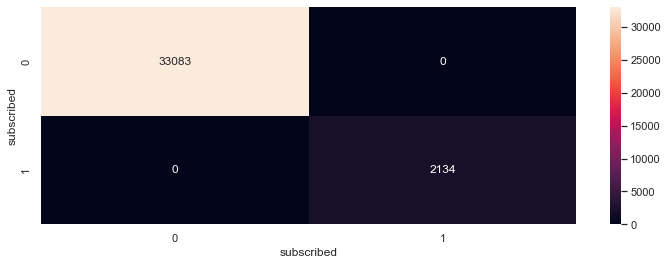

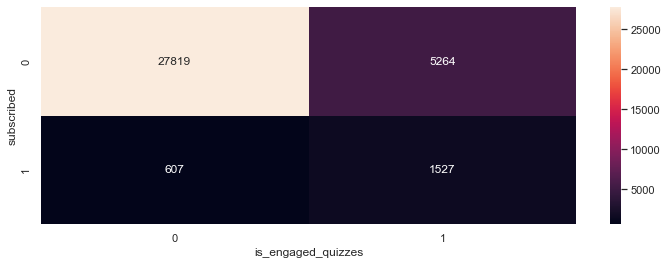

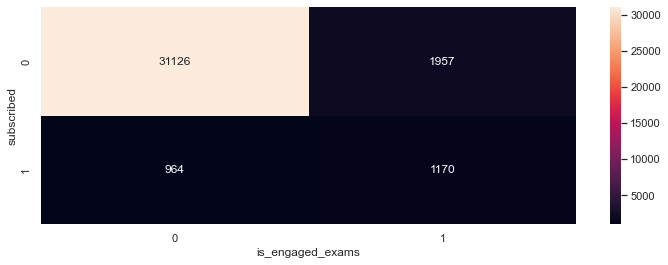

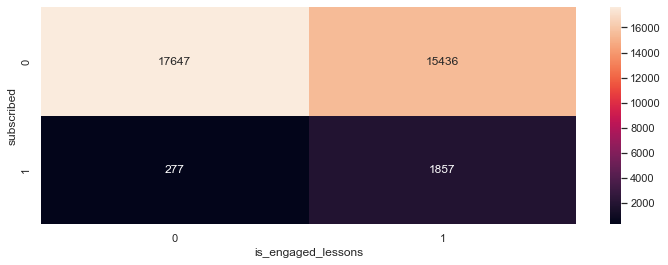

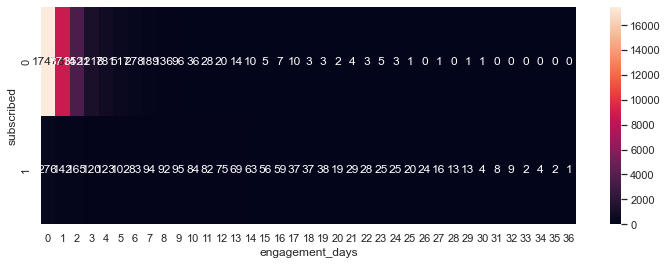

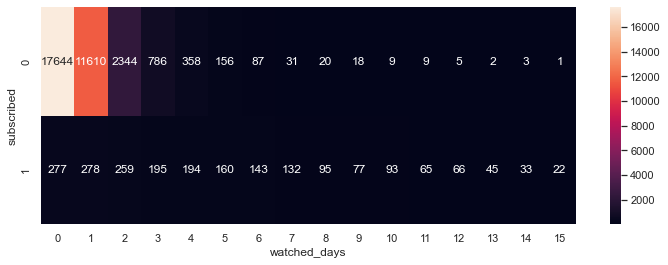

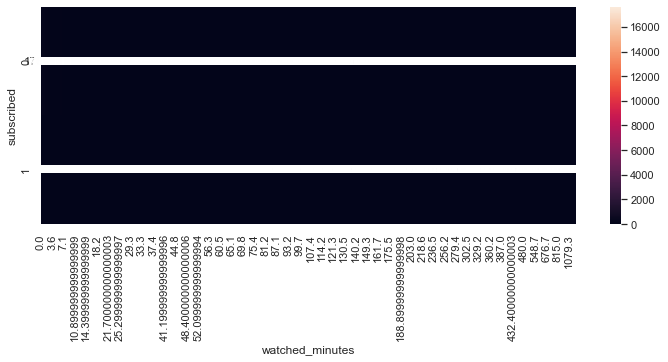

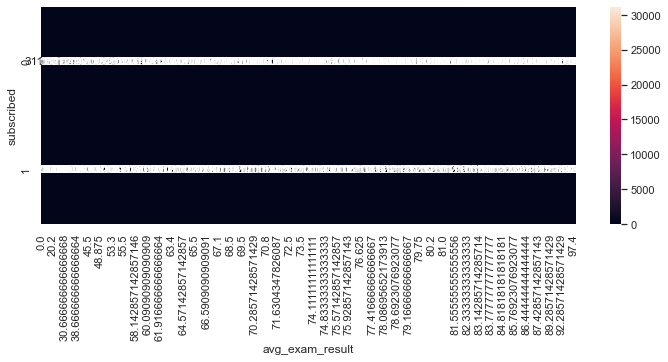

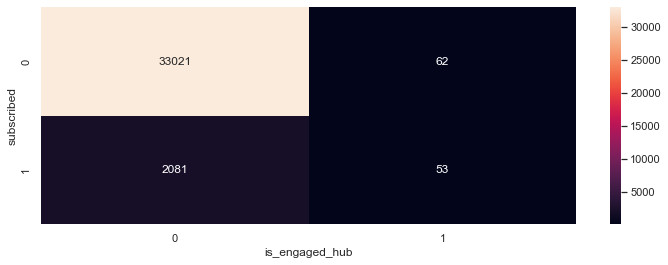

In [155]:
# Heatmap target variable vs each feature
for col in eda:
    plt.figure(figsize=(12, 4))
    sns.heatmap(pd.crosstab(eda['subscribed'], eda[col]), annot=True, fmt='d')

#### Correlation analysis

<AxesSubplot:>

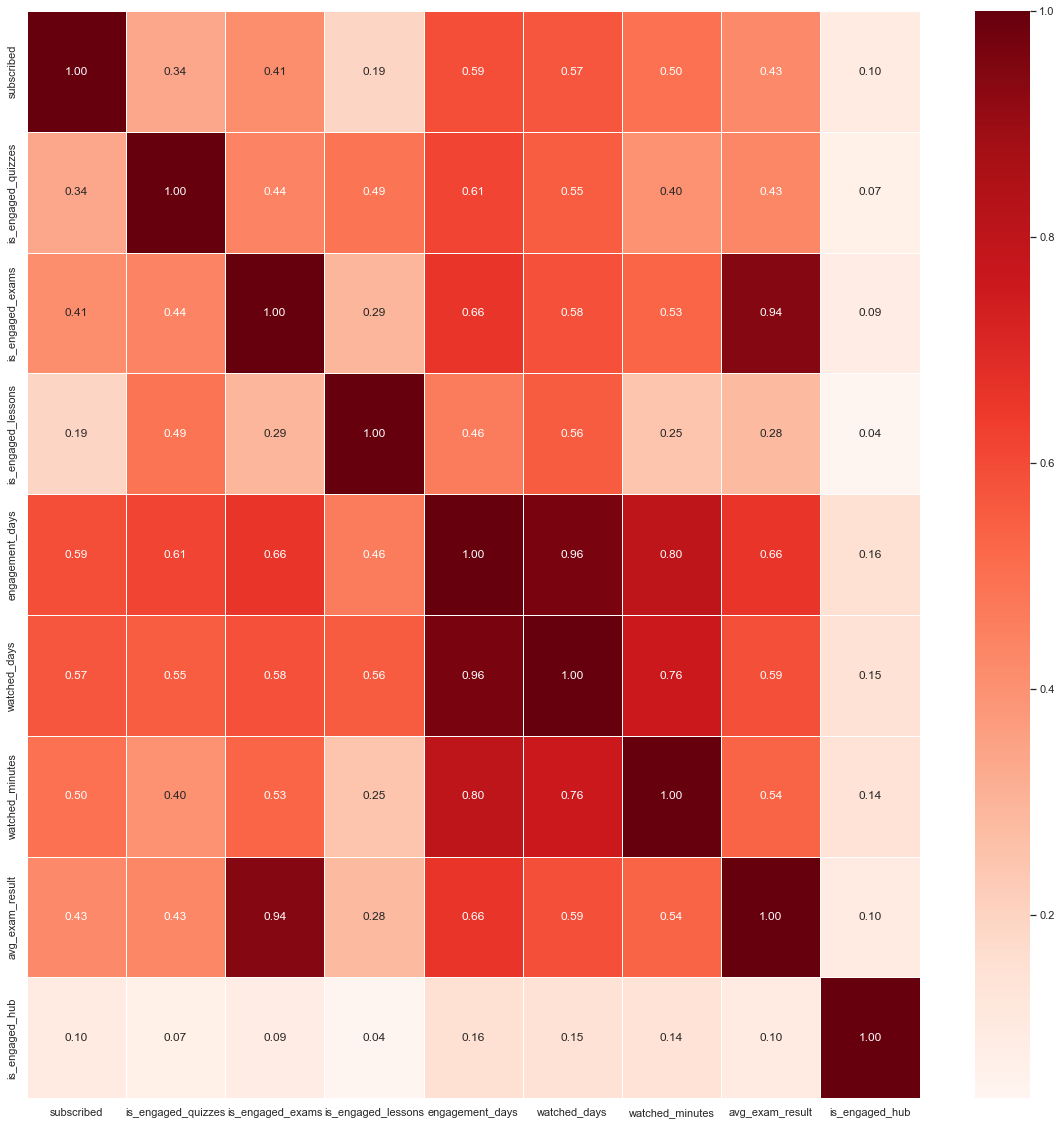

In [156]:
# Display correlation between numeric variables
plt.figure(figsize=(20, 20))
sns.heatmap(eda.corr(), annot=True, linewidth=.5, fmt='.2f', cmap='Reds')

The variables is_engaged_exams and avg_exam_result are very correlated.
This is not a surprise as you need to be engaged for exams if you want to pass them and have results.

In [157]:
eda.drop(['avg_exam_result','engagement_days'], axis=1, inplace=True)

No handles with labels found to put in legend.


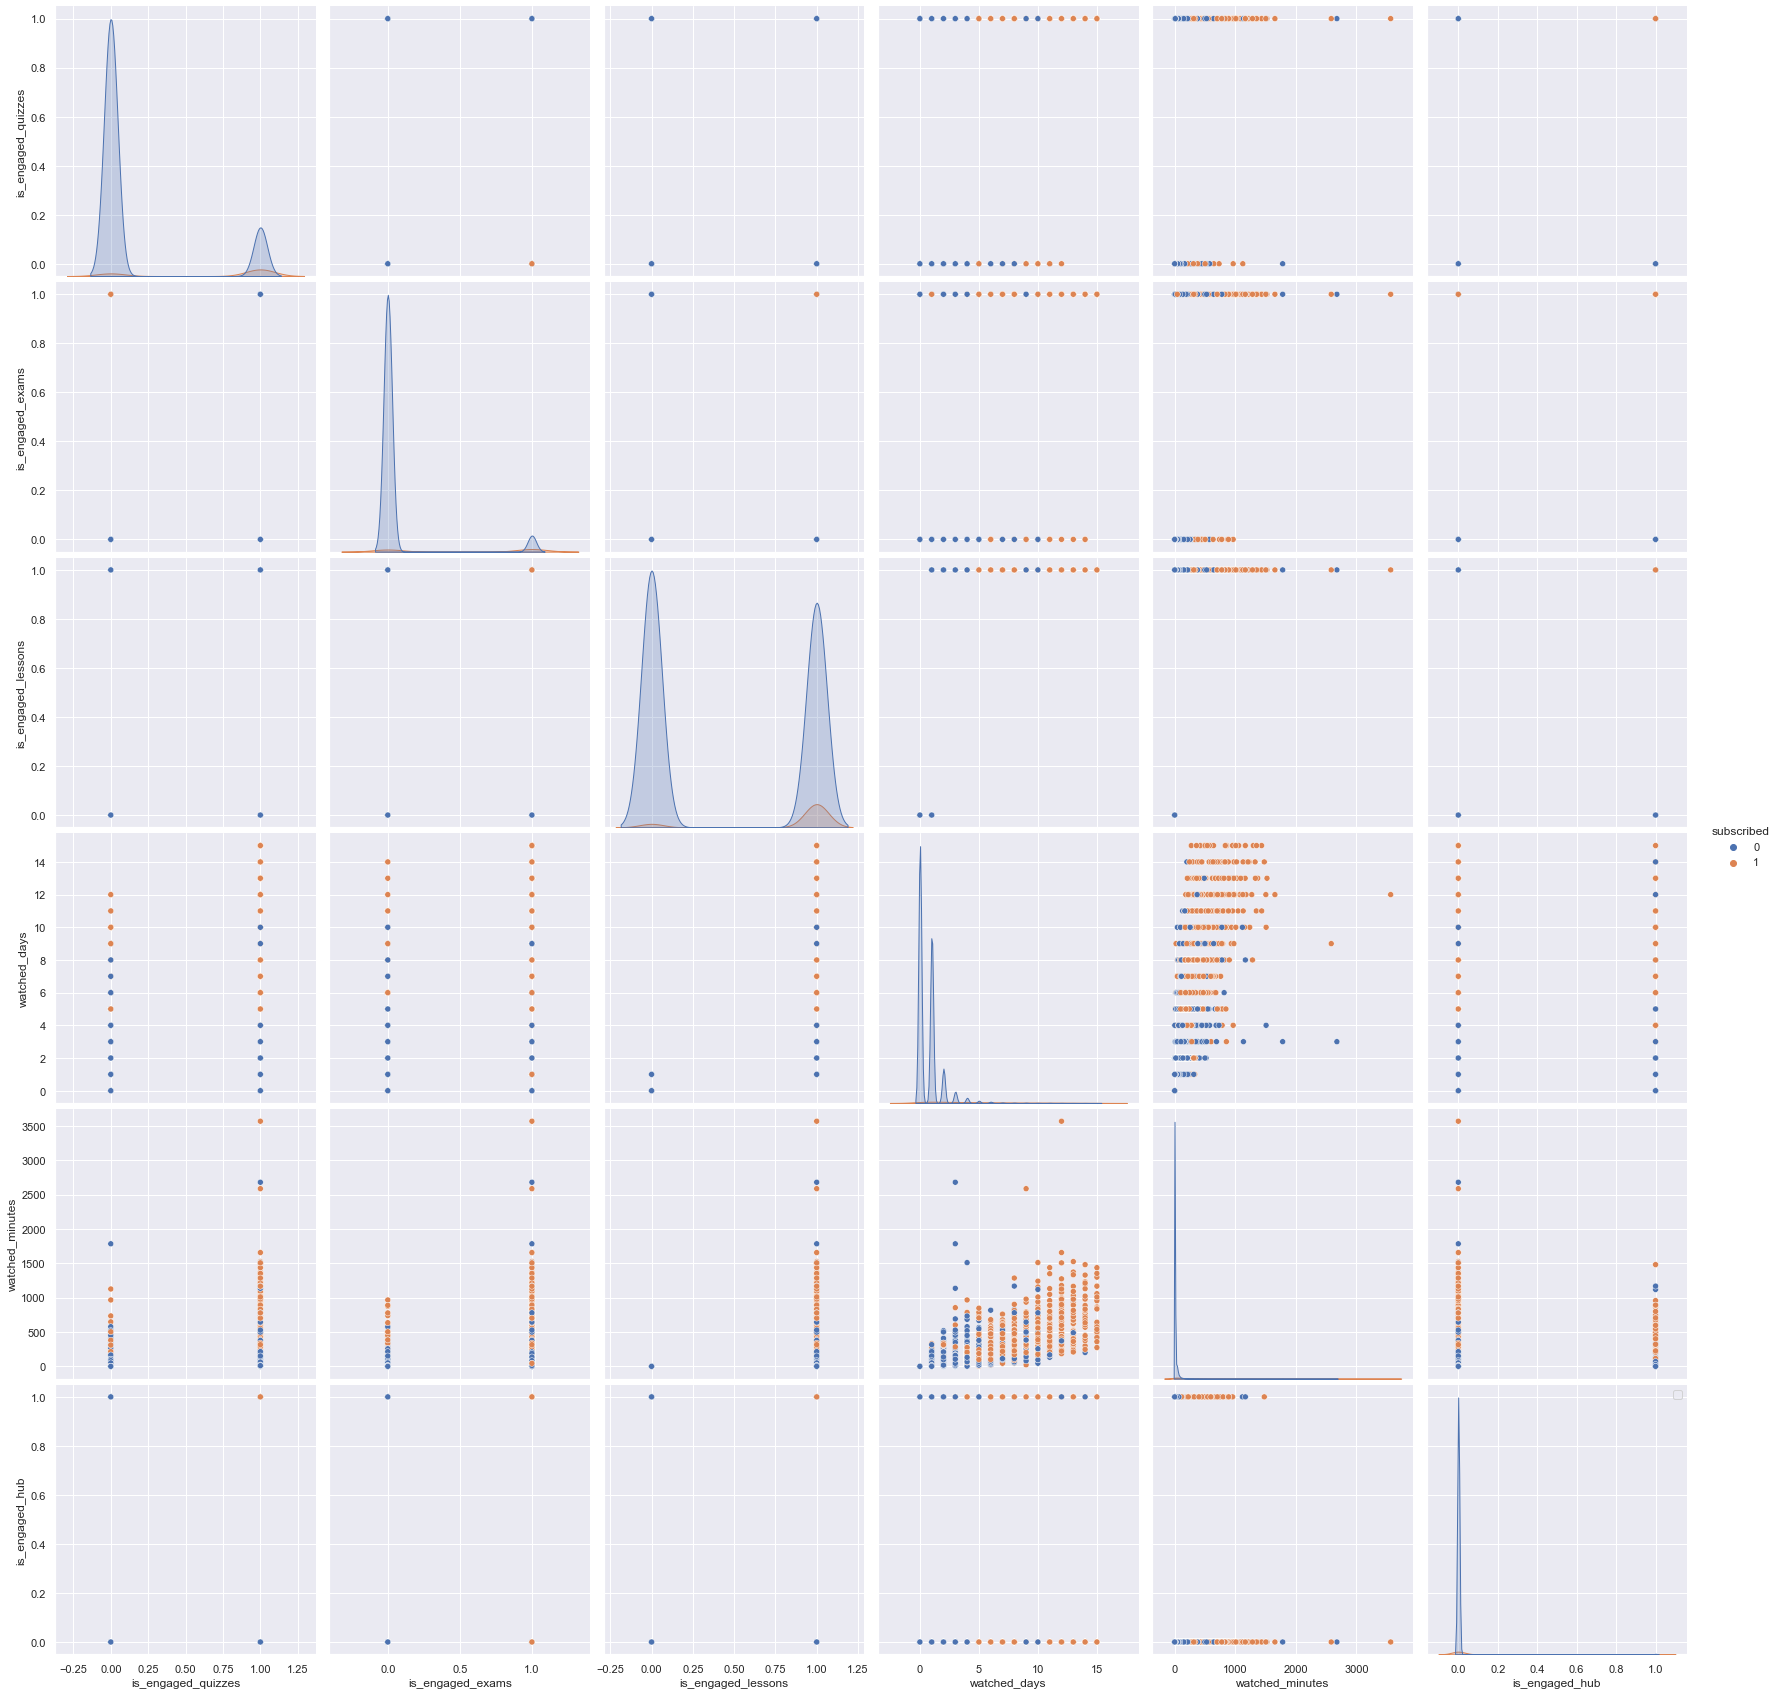

In [158]:
# Display relationships between variables
#subset = eda[['subscribed','Age','MonthlyIncome','Department','DistanceFromHome','JobInvolvement','JobRole','JobLevel']]
sns.pairplot(eda, hue = 'subscribed', height=4)
plt.legend()

#### Feature engineering

Feature engineering already done previously

#### Hypothesis testing

No hypothesis testing today.

#### Analysis of the scales of numerical features 

In [159]:
# Highlight cells that hold the maximum value of a column. 
# with styler background_gradient which gives columns a gradient background color based on their values
eda.describe().T.drop("count", axis=1).style.background_gradient(
    subset=["mean", "50%"], cmap="Reds"
)

,mean,std,min,25%,50%,75%,max
subscribed,0.060596,0.238591,0.000000,0.000000,0.000000,0.000000,1.000000
is_engaged_quizzes,0.192833,0.394529,0.000000,0.000000,0.000000,0.000000,1.000000
is_engaged_exams,0.088792,0.284448,0.000000,0.000000,0.000000,0.000000,1.000000
is_engaged_lessons,0.491041,0.499927,0.000000,0.000000,0.000000,1.000000,1.000000
watched_days,0.916234,1.678116,0.000000,0.000000,0.000000,1.000000,15.000000
watched_minutes,21.747412,89.681779,0.000000,0.000000,0.000000,6.400000,3567.700000
is_engaged_hub,0.003265,0.057052,0.000000,0.000000,0.000000,0.000000,1.000000


#### Copy of dataframe

In [160]:
df = eda.copy()

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35217 entries, 0 to 35216
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_country     35217 non-null  object 
 1   subscribed          35217 non-null  int32  
 2   is_engaged_quizzes  35217 non-null  int32  
 3   is_engaged_exams    35217 non-null  int32  
 4   is_engaged_lessons  35217 non-null  int32  
 5   watched_days        35217 non-null  int32  
 6   watched_minutes     35217 non-null  float64
 7   is_engaged_hub      35217 non-null  int32  
dtypes: float64(1), int32(6), object(1)
memory usage: 2.6+ MB


In [162]:
df.drop(['student_country'], axis=1, inplace=True)

#### Calculate categorical columns to be created with OneHotEncoder

In [163]:
# Select the object (string) columns
mask = df.dtypes == np.object
categorical_cols = df.columns[mask]

C:\Users\USER\AppData\Local\Temp/ipykernel_19092/3946244253.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = df.dtypes == np.object


In [164]:
#Display mask
mask

subscribed            False
is_engaged_quizzes    False
is_engaged_exams      False
is_engaged_lessons    False
watched_days          False
watched_minutes       False
is_engaged_hub        False
dtype: bool

In [165]:
#Display categorical features
categorical_cols

Index([], dtype='object')

In [166]:
#Unique values for catgorical data
df[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False)

Series([], dtype: float64)

In [167]:
# Determine how many extra columns would be created
num_ohc_cols = (df[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is a lot of columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

0.0

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35217 entries, 0 to 35216
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   subscribed          35217 non-null  int32  
 1   is_engaged_quizzes  35217 non-null  int32  
 2   is_engaged_exams    35217 non-null  int32  
 3   is_engaged_lessons  35217 non-null  int32  
 4   watched_days        35217 non-null  int32  
 5   watched_minutes     35217 non-null  float64
 6   is_engaged_hub      35217 non-null  int32  
dtypes: float64(1), int32(6)
memory usage: 2.4 MB


#### Preprocessing pipeline

In [169]:
num_feat = make_column_selector(dtype_include=np.number)
cat_feat = make_column_selector(dtype_include=object)

In [170]:
cat_feat

In [171]:
ss = StandardScaler()
ohe = OneHotEncoder(drop='first', sparse=True) #drop='first'  handle_unknown='infrequent_if_exist' handle_unknown='ignore'

In [172]:
num_pipe = make_pipeline(ss)
cat_pipe = make_pipeline(ohe)

In [173]:
preprocessor = make_column_transformer((num_pipe, num_feat),(cat_pipe, cat_feat))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001320B8396D0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001320B8390A0>)])

#### Split data in a stratified way (imbalanced class)

In [174]:
y_col="subscribed"

In [175]:
#Label encoding
le = LabelEncoder()
df[y_col] = le.fit_transform(df[y_col])

In [176]:
X = df.drop(y_col, axis=1)
y = df[y_col]

In [177]:
# Create test train split with stratify option in order to keep the same ratio of subscribed in train and test set
# as the class is heavy imbalanced.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size= 0.2,  # split size
                                                    random_state=13, # reproducible test
                                                    stratify=y)      # stratify split

In [178]:
# Check splits shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28173, 6), (7044, 6), (28173,), (7044,))

In [179]:
# Check stratified distribution of target variable after split on train set & test set
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.93941
 1    0.06059
 Name: subscribed, dtype: float64,
 0    0.939381
 1    0.060619
 Name: subscribed, dtype: float64)

In [180]:
# Check stratified distribution of target variable after split on train set & test set
y_train.value_counts(), y_test.value_counts()

(0    26466
 1     1707
 Name: subscribed, dtype: int64,
 0    6617
 1     427
 Name: subscribed, dtype: int64)

#### Evaluation 

In [181]:
# Function evaluate classifiers 
def eval_clf(models, X_train, y_train, X_test, y_test):

    models_columns = []
    models_comparison = pd.DataFrame(columns = models_columns)

    row_index = 0
    for i in models:  
        print ("Best parameters %s : \n" %i , models[i].best_params_)
        model = models[i].best_estimator_
        y_pred = model.fit(X_train, y_train).predict(X_test)
        
        # Plot confusion matrix
        plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
        
        fpr, tpr, threshold = roc_curve(y_test, y_pred)

        models_comparison.loc[row_index, 'Model name']     = i
        models_comparison.loc[row_index, 'Train Accuracy']     = round(model.score(X_train, y_train), 4)
        models_comparison.loc[row_index, 'Test Accuracy']      = round(model.score(X_test, y_test),  4)
        #models_comparison.loc[row_index, 'Balanced Accuracy']  = round(model.balanced_accuracy_score(X_test, y_test),  4)
        models_comparison.loc[row_index, 'Precision']      = precision_score(y_test, y_pred)
        models_comparison.loc[row_index, 'Recall']         = recall_score(y_test, y_pred)
        models_comparison.loc[row_index, 'AUC']            = auc(fpr, tpr)

        row_index+=1
    
    models_comparison.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)   
    
    return models_comparison

In [182]:
##### PARAMETERS ######
lr_params = {}

knn_params = {'KNN__n_neighbors': [1]} #list(range(1,10)}
                         
rfc_params  = {'RFC__n_estimators': [5],        #[5, 10, 50, 100],
               'RFC__max_depth':    [5],        #list(range(1,15)),
               'RFC__max_features': [5]}         # list(range(1,10))

lgb_params = {'LGB__n_estimators': [100],
              'LGB__learning_rate': [0.05],
              'LGB__max_depth':    [4], 
              'LGB__num_leaves':   [16],
              'LGB__alpha':        [1.5]}
              
##### FOLD ######
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

##### SCORE ######
scoring=recall_score

##### MODELS ######
models = {'LR':  GridSearchCV(Pipeline([("Preprocessor", preprocessor),("LR", LogisticRegression())]),
                                param_grid=lr_params,
                                cv=skf,
                                scoring=scoring, 
                                n_jobs = -1).fit(X_train, y_train),

# K nearest neighbors         
           'KNN': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                         ("KNN", KNeighborsClassifier())]),
                                          param_grid = knn_params, 
                                          cv=skf,
                                          scoring=scoring, 
                                          n_jobs = -1).fit(X_train, y_train),          
          
# Random Forest Classifier          
            'RFC': GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                          ("RFC", RandomForestClassifier(random_state=42))]),
                                          param_grid = rfc_params, 
                                          cv=skf,
                                          scoring=scoring, 
                                          n_jobs=-1).fit(X_train, y_train),
          
# LightGBM Classifier
            'LGB' : GridSearchCV(Pipeline([("Preprocessor", preprocessor),
                                          ("LGB",LGBMClassifier(verbose=-1, force_col_wise=True, boosting='gbrt', metric='metric', random_state=33))]),
                                          param_grid = lgb_params, 
                                          cv=skf,
                                          scoring=scoring, 
                                          n_jobs=-1).fit(X_train, y_train),               
          
         }           

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


[LightGBM] [Warning] boosting is set=gbrt, boosting_type=gbdt will be ignored. Current value: boosting=gbrt


Best parameters LR : 
 {}
Best parameters KNN : 
 {'KNN__n_neighbors': 1}
Best parameters RFC : 
 {'RFC__max_depth': 5, 'RFC__max_features': 5, 'RFC__n_estimators': 5}
Best parameters LGB : 
 {'LGB__alpha': 1.5, 'LGB__learning_rate': 0.05, 'LGB__max_depth': 4, 'LGB__n_estimators': 100, 'LGB__num_leaves': 16}


,Model name,Train Accuracy,Test Accuracy,Precision,Recall,AUC
3,LGB,0.9602,0.9591,0.768340,0.466042,0.728487
0,LR,0.9585,0.9581,0.808411,0.405152,0.699478
2,RFC,0.9595,0.9580,0.799087,0.409836,0.701593
1,KNN,0.9766,0.9371,0.479695,0.442623,0.705821


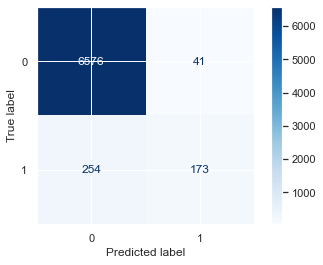

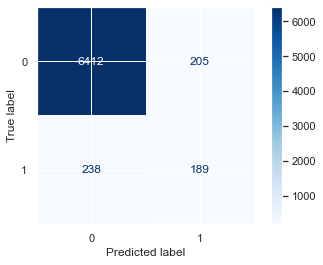

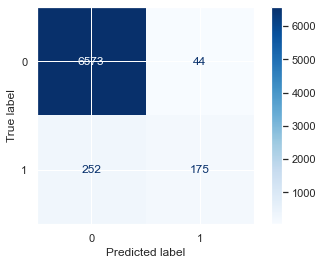

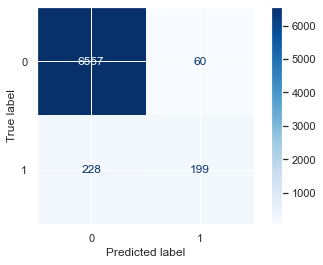

In [183]:
# Models comparison
models_comparison = eval_clf(models, X_train, y_train, X_test, y_test)
models_comparison

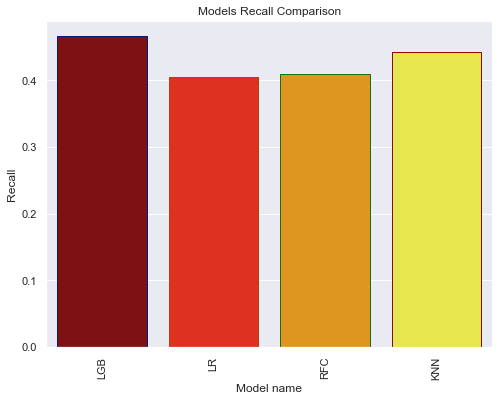

In [184]:
plt.subplots(figsize=(8,6))
sns.barplot(x="Model name", y="Recall",data=models_comparison,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Models Recall Comparison')
plt.show()

In [185]:
# Plot ROC curve for all models
def plot_roc_clf(models, X_train, y_train, X_test, y_test):
    
    index = 1
    for i in models:
        y_pred = models[i].fit(X_train, y_train).predict(X_test)
        y_prob = models[i].fit(X_train, y_train).predict_proba(X_test)  
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        roc_auc_mod = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (i, roc_auc_mod))

        index+=1

    plt.title('ROC Curve comparison')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')    
    plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\U

[LightGBM] [Warning] boosting is set=gbrt, boosting_type=gbdt will be ignored. Current value: boosting=gbrt


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


[LightGBM] [Warning] boosting is set=gbrt, boosting_type=gbdt will be ignored. Current value: boosting=gbrt


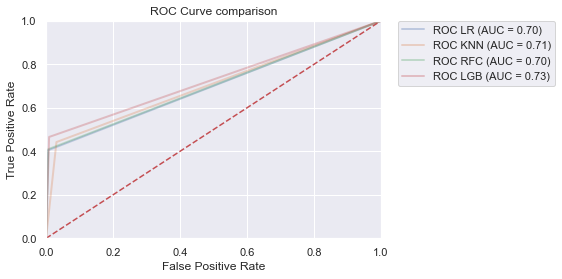

In [186]:
plot_roc_clf(models, X_train, y_train, X_test, y_test)

In [187]:
# Plot Precision Recall curve for all models
def plot_prc_clf(models, X_train, y_train, X_test, y_test):
    
    index = 1
    
    for i in models:
        y_pred = models[i].fit(X_train, y_train).predict(X_test)
        y_prob = models[i].fit(X_train, y_train).predict_proba(X_test)  

        prob_pred = np.array([y_prob[i, 1 if c else 0]
                         for i, c in enumerate(y_pred)])

        precisions, recalls, thresholds = precision_recall_curve(y_test, prob_pred)
        
        plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
        plt.plot(thresholds, recalls[:-1],    "y--", label="Recall")
        plt.title('Precision & Recall versus the decision threshold \n %s' %i)
        plt.xlabel('Threshold') 
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        
        plt.plot(recalls, precisions, color='green')
        plt.title('Precision Recall Curve \n %s' %i)
        plt.xlabel('Recall') 
        plt.ylabel('Precision')
        plt.show()
        
        index+=1

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


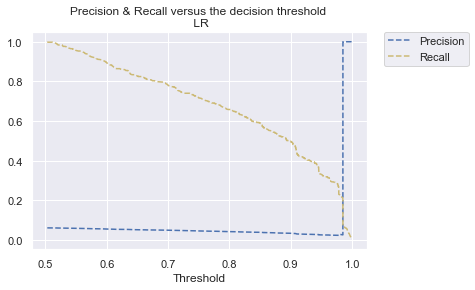

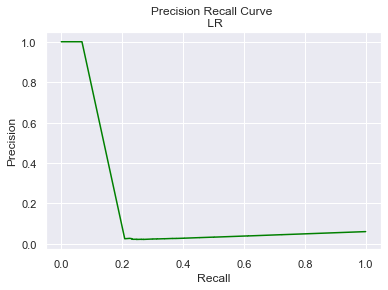

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


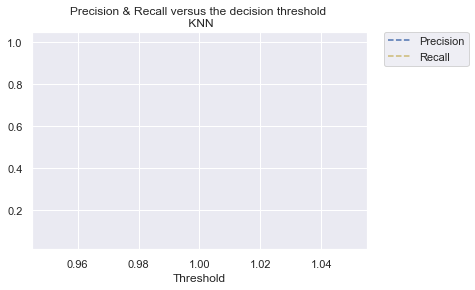

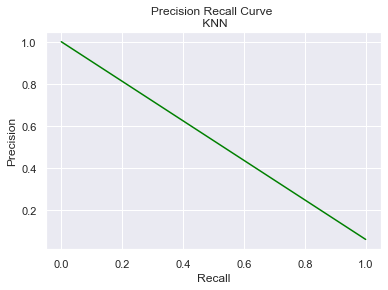

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


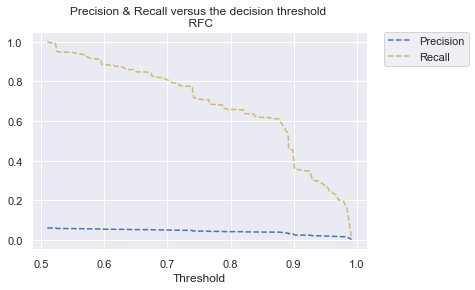

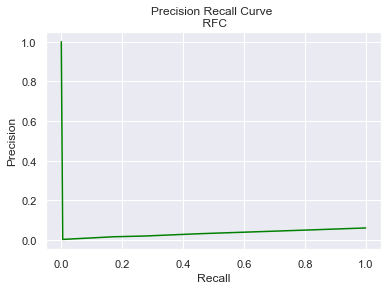

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


[LightGBM] [Warning] boosting is set=gbrt, boosting_type=gbdt will be ignored. Current value: boosting=gbrt


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


[LightGBM] [Warning] boosting is set=gbrt, boosting_type=gbdt will be ignored. Current value: boosting=gbrt


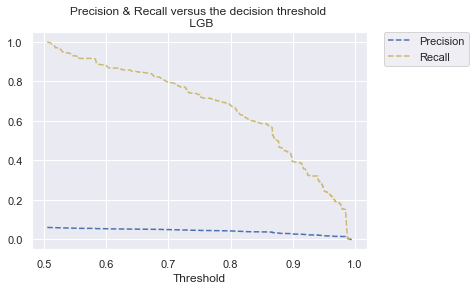

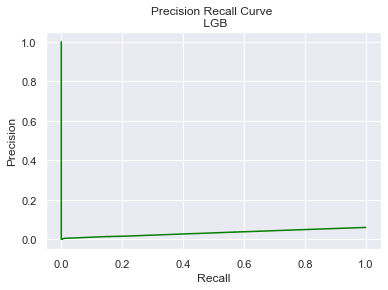

In [188]:
plot_prc_clf(models, X_train, y_train, X_test, y_test)